(Baseline_Feature_Transformation)=
# Baseline feature transformation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install azureml-dataset-runtime
# !pip install mltable
# !pip install azure-ai-ml

In [1]:
# !pip install azureml
# # !az login
# !pip install azureml-core
# !pip install azureml-datadrift

In [ ]:
# Initialization: Load shared functions and simulated data

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

# # Get simulated data from Github repository
# if not os.path.exists("simulated-data-raw"):
#     !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-raw


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0   173k      0 --:--:-- --:--:-- --:--:--  173k


## FOR STORING

In [ ]:
# Cell 1: Connect to Workspace and Datastore

import os
import datetime
import pandas as pd
import tempfile

# Azure ML Core SDK (v1) for connection and datastore object
from azureml.core import Workspace, Datastore

# --- Prerequisites ---
# 1. Ensure 'azureml-core' is installed: pip install azureml-core
# 2. Ensure you can connect to your workspace (e.g., run in Azure ML, have config.json, etc.)
subscription_id = ''
resource_group = ''
workspace_name = ''

# --- Azure ML Connection ---
try:
    # Load the workspace from the current environment or config file
    ws = Workspace(subscription_id, resource_group, workspace_name)# Assumes config.json or Azure ML environment
    print(f"Connected to Azure ML workspace: {ws.name}")

    # Get the default datastore (SDK v1 object)
    datastore = ws.get_default_datastore()
    print(f"Using default datastore: {datastore.name} (Type: {datastore.datastore_type})")

except Exception as e:
    print(f"Error connecting to Azure ML Workspace or getting datastore: {e}")
    print("Please ensure you are running in an Azure ML environment or have a valid config.json.")
    raise SystemExit("Failed to connect to Azure ML Workspace.")

print("\nWorkspace and Datastore objects are ready for the next step.")
# Make sure 'transactions_df' DataFrame is loaded before running the next cell.
# Example: transactions_df = pd.read_csv(...) or generated from previous steps.

Connected to Azure ML workspace: mlw-fraudmltr-fdx014prod
Using default datastore: workspaceblobstore (Type: AzureBlob)

Workspace and Datastore objects are ready for the next step.


InProgress..
SucceededProvisioning operation finished, operation "Succeeded"
Succeeded
AmlCompute wait for completion finished

Minimum number of nodes requested have been provisioned
2025-04-22 11:38:21,602 - azureml.datadrift._logging._telemetry_logger.azureml.datadrift.datadriftdetector - WARNING - Alert has not been setup. Datadriftdetector with id: 600a715b-0c8a-4b6a-9908-dc842294da72.
This may be because you do not have access to the AppInsights associated with this AzureML Workspace - activity_id:0f7e2c76-e6f1-4bb0-afc9-c1d823a158a9 activity_name:constructor activity_type:InternalCall tenant_id:None subscription_id:59fbddf1-e99b-4eac-b99e-9d007add5ba3 resource_group:rg-fraudmltr-fdx014prod workspace_id:9fe51dbd-7b0e-471d-ac63-b6ce56ecaa1d workspace_location:eastus compute_type:None compute_size:None compute_nodes_min:None compute_nodes_max:None image_id:None dd_id:None dd_type:DatasetBased freq:Day interval:None scheduling:None threshold:None latency:1 total_features:1 services:

In [ ]:

# # --- Configuration ---
# # Define the target directory *within* the Azure Blob Storage container
# # associated with the default datastore.
# TARGET_BLOB_DIR = "daily-transactions-raw" # Changed name slightly for clarity

# # Define the start date corresponding to day 0 in your data
# start_date = datetime.datetime.strptime("2025-04-01", "%Y-%m-%d")

# # # --- 1. Connect to Azure ML Workspace ---
# # try:
# #     ws = Workspace.from_config()
# #     print(f"Connected to Azure ML Workspace: {ws.name}")
# # except Exception as e:
# #     print(f"Could not automatically connect to workspace: {e}")
# #     print("Attempting manual connection details if needed (ensure you fill them in)")
# #     # Uncomment and fill if needed:
# #     # from azureml.core.authentication import InteractiveLoginAuthentication
# #     # interactive_auth = InteractiveLoginAuthentication()
# #     # ws = Workspace.get(name="<workspace_name>",
# #     #                    subscription_id="<sub_id>",
# #     #                    resource_group="<rg_name>",
# #     #                    auth=interactive_auth)

# # if 'ws' not in locals():
# #      print("ERROR: Workspace connection failed. Cannot proceed.")
# #      exit()

# # --- 2. Get the Default Datastore ---
# try:
#     datastore = ws.get_default_datastore() # Renamed to 'datastore' to match your snippet
#     print(f"\nUsing Default Datastore: {datastore.name} ({datastore.datastore_type})")

#     # --- Processing and Uploading Loop ---
#     print(f"\nStarting data processing and upload to datastore '{datastore.name}'...")
#     print(f"Target directory in datastore: '{TARGET_BLOB_DIR}'")

#     # Use a temporary directory to stage files locally before uploading
#     with tempfile.TemporaryDirectory() as temp_dir:
#         print(f"Using temporary directory for staging: {temp_dir}")

#         # Assuming 'TX_TIME_DAYS' column exists and represents days since start_date
#         if 'TX_TIME_DAYS' not in transactions_df.columns:
#              raise ValueError("DataFrame must contain a 'TX_TIME_DAYS' column.")

#         max_days = transactions_df.TX_TIME_DAYS.max()
#         print(f"Processing data for {max_days + 1} days (0 to {max_days})...")

#         for day in range(max_days + 1):
#             print(f"\nProcessing Day {day}/{max_days}...")

#             # Filter data for the current day and sort (as per your original logic)
#             # Ensure 'TX_TIME_SECONDS' exists if you need sorting
#             if 'TX_TIME_SECONDS' in transactions_df.columns:
#                 transactions_day = transactions_df[transactions_df.TX_TIME_DAYS == day].sort_values('TX_TIME_SECONDS')
#             else:
#                 transactions_day = transactions_df[transactions_df.TX_TIME_DAYS == day]
#                 print("  Warning: 'TX_TIME_SECONDS' column not found, skipping sort.")


#             if transactions_day.empty:
#                 print(f"  No transactions found for day {day}. Skipping.")
#                 continue

#             # Calculate date and create filename (now with .parquet extension)
#             date = start_date + datetime.timedelta(days=day)
#             filename_output = date.strftime("%Y-%m-%d") + '.parquet' # Changed extension

#             # --- Save to Temporary Local Parquet File ---
#             temp_local_filepath = os.path.join(temp_dir, filename_output)
#             try:
#                 # Save as Parquet using pyarrow engine
#                 transactions_day.to_parquet(
#                     temp_local_filepath,
#                     version='1.0',
#                     engine='pyarrow',
#                     index=False # Often don't need the pandas index saved
#                 )
#                 print(f"  Saved data locally to temporary file: {temp_local_filepath}")
#             except Exception as e:
#                 print(f"  Error saving day {day} to temporary parquet file: {e}")
#                 continue # Skip to the next day if saving fails

#             # --- Upload the single Parquet file to Azure ML Datastore ---
#             try:
#                 print(f"  Uploading '{filename_output}' to datastore path: '{TARGET_BLOB_DIR}/'")
#                 # datastore.upload_files expects a list of files to upload
#                 # target_path is the destination *directory* within the datastore
#                 datastore.upload_files(
#                     files=[temp_local_filepath],    # List containing the path to the temp file
#                     target_path=TARGET_BLOB_DIR,    # Target directory in the blob container
#                     overwrite=True,                 # Overwrite if file already exists in blob
#                     show_progress=False             # Set to True for verbose progress bars
#                 )
#                 # The final path in the blob store will be: <container_root>/TARGET_BLOB_DIR/filename_output
#                 print(f"  Successfully uploaded to {datastore.name}/{TARGET_BLOB_DIR}/{filename_output}")

#             except Exception as e:
#                 print(f"  Error uploading file {filename_output} to datastore: {e}")
#                 # Decide how to handle upload errors (e.g., retry, log, raise)

#             # No need to manually remove temp_local_filepath, the TemporaryDirectory context manager handles it.

#     print("\nFinished processing and uploading all files.")

# except Exception as e:
#     print(f"\nAn error occurred outside the main processing loop: {e}")
#     import traceback
#     traceback.print_exc()
#     print("\nTroubleshooting:")
#     print("- Ensure 'azureml-core', 'pyarrow', and 'pandas' are installed")
#     print("- Check storage permissions (e.g., Storage Blob Data Contributor role on the storage account)")
#     print("- Validate Azure authentication (running in AML Compute, logged in via CLI, etc.)")
#     print("- Ensure your DataFrame ('transactions_df') is loaded correctly and has 'TX_TIME_DAYS'.")

# # --- Dependency Notes ---
# print("\n--- Package Recommendations ---")
# print("If you see urllib3 warnings, run:")
# print('pip install "urllib3<1.27"')
# print("Required packages: pandas, azureml-core, pyarrow")

## Loading of dataset

Let us first load the transaction data simulated in the previous notebook. We will load the transaction files from April to September. Files can be loaded using the `read_from_files` function in the [shared functions](shared_functions) notebook. The function was put in this notebook since it will be used frequently throughout this book.

The function takes as input the folder where the data files are located, and the dates that define the period to load (between `BEGIN_DATE` and `END_DATE`). It returns a DataFrame of transactions. The transactions are sorted by chronological order.


In [10]:
# Initialization: Load shared functions and simulated data

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

# # Get simulated data from Github repository
# if not os.path.exists("simulated-data-raw"):
#     !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-raw


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0   205k      0 --:--:-- --:--:-- --:--:--  205k


In [8]:
# from azureml.core import Workspace, Dataset

# subscription_id = ''
# resource_group = ''
# workspace_name = ''

# workspace = Workspace(subscription_id, resource_group, workspace_name)

# dataset = Dataset.get_by_name(workspace, name='sim_data', version=1)
# dataset.download(target_path='./transformed_transactions_Fraud/', overwrite=True)

In [11]:
DIR_INPUT='./transformed_transactions_Fraud/'

BEGIN_DATE = "2025-08-15"
END_DATE = "2025-12-26"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))
transactions_df

Load  files
CPU times: user 564 ms, sys: 1.17 s, total: 1.73 s
Wall time: 1.77 s
1284368 transactions loaded, containing 11330 fraudulent transactions


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,1303778,2025-08-15 00:00:39,3197,9424,22.43,11750439,136,0,0,0,...,21.0,63.748095,85.0,70.731176,1.0,0.0,11.0,0.0,49.0,0.00
1,1303779,2025-08-15 00:00:40,2954,4648,70.35,11750440,136,0,0,0,...,11.0,91.099091,78.0,86.743590,0.0,0.0,8.0,0.0,24.0,0.00
2,1303780,2025-08-15 00:00:51,112,2994,22.20,11750451,136,0,0,0,...,28.0,30.636429,133.0,34.212030,1.0,0.0,10.0,0.0,43.0,0.00
3,1303781,2025-08-15 00:01:13,3218,4276,96.99,11750473,136,0,0,0,...,24.0,76.391667,93.0,81.349462,1.0,0.0,6.0,0.0,26.0,0.00
4,1303782,2025-08-15 00:02:19,2475,8738,32.24,11750539,136,0,0,0,...,28.0,57.143929,99.0,60.792222,0.0,0.0,5.0,0.2,25.0,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284363,2588141,2025-12-26 23:56:41,3553,4355,97.63,23327801,269,0,0,0,...,17.0,105.164706,90.0,88.807889,3.0,0.0,12.0,0.0,28.0,0.00
1284364,2588142,2025-12-26 23:57:13,374,5464,7.98,23327833,269,0,0,0,...,3.0,13.043333,16.0,9.609375,2.0,0.0,9.0,0.0,33.0,0.00
1284365,2588143,2025-12-26 23:57:26,3711,5466,111.84,23327846,269,0,0,0,...,21.0,77.424762,115.0,68.874609,0.0,0.0,2.0,0.0,25.0,0.00
1284366,2588144,2025-12-26 23:57:59,3543,5105,35.36,23327879,269,0,0,0,...,12.0,52.781667,71.0,52.106197,1.0,0.0,6.0,0.0,22.0,0.00


In [13]:
from azureml.core import Workspace, Dataset

subscription_id = ''
resource_group = ''
workspace_name = ''

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='training_transformed_daily_transactions_fraud', version='1')

print("Converting dataset to Pandas DataFrame...")
training_df = dataset.to_pandas_dataframe()
print("Conversion complete.")
training_df.head()

Converting dataset to Pandas DataFrame...
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}
Conversion complete.


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,680886,2025-06-11 00:00:24,3711,8121,75.81,6134424,71,0,0,0,...,34.0,69.421471,124.0,70.598710,2.0,0.0,10.0,0.0,38.0,0.000000
1,680887,2025-06-11 00:00:25,1320,867,101.89,6134425,71,0,0,0,...,27.0,92.666667,117.0,83.699402,1.0,0.0,10.0,0.0,31.0,0.032258
2,680888,2025-06-11 00:01:46,824,7954,44.72,6134506,71,0,0,0,...,23.0,37.035217,80.0,40.290125,2.0,0.0,14.0,0.0,35.0,0.000000
3,680889,2025-06-11 00:02:40,1085,8595,23.08,6134560,71,0,0,0,...,24.0,55.140833,101.0,54.151386,1.0,0.0,8.0,0.0,27.0,0.000000
4,680890,2025-06-11 00:02:55,346,4909,98.13,6134575,71,0,0,0,...,7.0,57.628571,38.0,63.603158,4.0,0.0,13.0,0.0,30.0,0.000000


In [14]:
import pandas as pd
import numpy as np
from typing import List, Tuple

def _stratified_sample_for_period(df_period: pd.DataFrame,
                                  target_n: int,
                                  stratify_cols: List[str],
                                  random_state: int = None) -> pd.DataFrame:
    """
    Helper function to perform stratified sampling on a given DataFrame period.
    """
    if df_period.empty:
        return pd.DataFrame(columns=df_period.columns)

    if target_n <= 0:
        return pd.DataFrame(columns=df_period.columns)

    original_size = len(df_period)
    # If target is larger than available, return all available (shuffled)
    if target_n >= original_size:
        return df_period.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # Calculate proportions of each stratum in the current period
    strata_props = df_period.groupby(stratify_cols, observed=False).size() / original_size

    # Function to sample within each group based on its proportion
    def sample_group(group, target_props, total_target_size, random_state):
        strata_key = group.name
        prop = target_props.get(strata_key, 0)
        # Calculate target, ensuring at least 1 if prop > 0 and group not empty
        target_n_for_group = max(1, int(round(total_target_size * prop))) if prop > 0 else 0
        n_available = len(group)
        n_to_sample = min(target_n_for_group, n_available)

        if n_to_sample <= 0:
             return pd.DataFrame(columns=group.columns) # Return empty if no samples needed/possible

        return group.sample(n=n_to_sample, random_state=random_state)

    # Apply the sampling function to each group
    sampled_df = df_period.groupby(stratify_cols, group_keys=False, observed=False).apply(
        lambda g: sample_group(g, target_props=strata_props, total_target_size=target_n, random_state=random_state)
    )

    return sampled_df.reset_index(drop=True)


def monthly_stratified_subsample_with_daily_coverage(
    df: pd.DataFrame,
    target_monthly_n: int,
    date_col: str = 'TX_DATETIME',
    fraud_col: str = 'TX_FRAUD',
    scenario_col: str = 'TX_FRAUD_SCENARIO',
    min_daily_samples: int = 1, # Min samples to add back for missing days
    random_state: int = None
) -> pd.DataFrame:
    """
    Subsamples a DataFrame to approx. target_monthly_n rows per month,
    stratifying by fraud/scenario and ensuring daily coverage.

    Args:
        df (pd.DataFrame): Input DataFrame with datetime, fraud, and scenario columns.
        target_monthly_n (int): Target number of rows per month.
        date_col (str): Name of the datetime column.
        fraud_col (str): Name of the fraud indicator column.
        scenario_col (str): Name of the fraud scenario column.
        min_daily_samples (int): Minimum samples to add from days initially missed.
        random_state (int, optional): Seed for reproducibility. Defaults to None.

    Returns:
        pd.DataFrame: Subsampled DataFrame.
    """
    if not pd.api.types.is_datetime64_any_dtype(df[date_col]):
        print(f"Converting column '{date_col}' to datetime...")
        try:
            df[date_col] = pd.to_datetime(df[date_col])
        except Exception as e:
            raise ValueError(f"Could not convert '{date_col}' to datetime: {e}")

    # Ensure scenario col exists and handle potential NaNs if necessary
    if scenario_col not in df.columns:
         raise ValueError(f"Scenario column '{scenario_col}' not found.")
    # Fill NaNs in scenario col, assuming they correspond to non-fraud (scenario 0)
    # df[scenario_col] = df[scenario_col].fillna(0).astype(int) # Optional: if NaNs are possible

    df['year_month'] = df[date_col].dt.to_period('M')
    df['date_only'] = df[date_col].dt.date # For daily coverage check

    all_monthly_samples = []
    stratify_cols = [fraud_col, scenario_col]
    rng = np.random.default_rng(random_state) # For seeding within the loop if needed

    print(f"Processing data month by month (Target ~{target_monthly_n}/month)...")
    for month, month_df in df.groupby('year_month', observed=True):
        print(f"\nProcessing {month} ({len(month_df)} rows)...")
        original_days_in_month = set(month_df['date_only'].unique())
        n_original_days = len(original_days_in_month)
        print(f"  Original days in this month: {n_original_days}")

        # 1. Perform initial stratified sampling for the month
        # Use a potentially different seed for each month's main sample if desired
        month_seed = rng.integers(10000) if random_state is not None else None
        sampled_month_df = _stratified_sample_for_period(
            month_df,
            target_n=target_monthly_n,
            stratify_cols=stratify_cols,
            random_state=month_seed
        )
        print(f"  Initial stratified sample size: {len(sampled_month_df)}")

        # 2. Check for daily coverage and add missing days
        sampled_days = set(sampled_month_df['date_only'].unique())
        missing_dates = original_days_in_month - sampled_days

        print(f"  Days represented in initial sample: {len(sampled_days)}")
        print(f"  Days missing from initial sample: {len(missing_dates)}")

        if missing_dates:
            print(f"  Adding samples for {len(missing_dates)} missing days...")
            missing_day_samples = []
            for missing_date in sorted(list(missing_dates)):
                 day_df = month_df[month_df['date_only'] == missing_date]
                 # Use a potentially different seed for each day's small sample
                 day_seed = rng.integers(10000) if random_state is not None else None
                 # Sample a small number stratifying by fraud/scenario
                 day_sample = _stratified_sample_for_period(
                     day_df,
                     target_n=min_daily_samples, # Get at least this many
                     stratify_cols=stratify_cols,
                     random_state=day_seed
                 )
                 if not day_sample.empty:
                     missing_day_samples.append(day_sample)

            if missing_day_samples:
                # Combine initial sample with samples from missing days
                sampled_month_df = pd.concat([sampled_month_df] + missing_day_samples, ignore_index=True)
                print(f"  Added {sum(len(s) for s in missing_day_samples)} rows for missing days.")

        final_month_size = len(sampled_month_df)
        print(f"  Final sample size for {month}: {final_month_size}")
        final_days_represented = len(sampled_month_df['date_only'].unique())
        print(f"  Final days represented for {month}: {final_days_represented} (Expected: {n_original_days})")
        if final_days_represented < n_original_days:
             print(f"  WARNING: Still missing {n_original_days - final_days_represented} days for {month}. This might happen if a day had very few rows or only one stratum.")


        all_monthly_samples.append(sampled_month_df)

    # Combine all monthly samples
    final_sampled_df = pd.concat(all_monthly_samples, ignore_index=True)

    # Clean up temporary columns
    final_sampled_df = final_sampled_df.drop(columns=['year_month', 'date_only'])

    # Final shuffle
    final_sampled_df = final_sampled_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    print(f"\nTotal sampled rows across all months: {len(final_sampled_df)}")
    return final_sampled_df

# --- Example Usage ---
# Assuming 'transactions_df' is your full DataFrame loaded from the original pkl files
# and contains 'TX_DATETIME', 'TX_FRAUD', 'TX_FRAUD_SCENARIO'

target_monthly_size = 10000
sampled_data = monthly_stratified_subsample_with_daily_coverage(
    transactions_df,
    target_monthly_n=target_monthly_size,
    random_state=42 # For reproducibility
)

print(f"\nOverall sampled data shape: {sampled_data.shape}")

# --- Verification (Optional) ---
# Check size per month
sampled_data['TX_DATETIME'] = pd.to_datetime(sampled_data['TX_DATETIME']) # Ensure datetime
print("\nSampled rows per month:")
print(sampled_data['TX_DATETIME'].dt.to_period('M').value_counts().sort_index())

# Check daily coverage for a specific month (e.g., first month in the sample)
if not sampled_data.empty:
    first_month_period = sampled_data['TX_DATETIME'].dt.to_period('M').min()
    print(f"\nChecking daily coverage for month: {first_month_period}")

    original_month_df = transactions_df[transactions_df['TX_DATETIME'].dt.to_period('M') == first_month_period]
    sampled_month_df = sampled_data[sampled_data['TX_DATETIME'].dt.to_period('M') == first_month_period]

    original_days = set(original_month_df['TX_DATETIME'].dt.date.unique())
    sampled_days = set(sampled_month_df['TX_DATETIME'].dt.date.unique())
    missing_in_sample = original_days - sampled_days

    print(f"  Original days in {first_month_period}: {len(original_days)}")
    print(f"  Sampled days in {first_month_period}: {len(sampled_days)}")
    if not missing_in_sample:
        print("  Daily coverage verified for this month.")
    else:
        print(f"  WARNING: Days missing in sample for {first_month_period}: {sorted(list(missing_in_sample))}")

    # Check stratification for that month
    print(f"\nOriginal Stratification for {first_month_period}:")
    print(original_month_df.groupby(['TX_FRAUD', 'TX_FRAUD_SCENARIO'], observed=False).size() / len(original_month_df))
    print(f"\nSampled Stratification for {first_month_period}:")
    print(sampled_month_df.groupby(['TX_FRAUD', 'TX_FRAUD_SCENARIO'], observed=False).size() / len(sampled_month_df))




Processing data month by month (Target ~10000/month)...

Processing 2025-08 (162504 rows)...
  Original days in this month: 17
  Initial stratified sample size: 9999
  Days represented in initial sample: 17
  Days missing from initial sample: 0
  Final sample size for 2025-08: 9999
  Final days represented for 2025-08: 17 (Expected: 17)

Processing 2025-09 (287873 rows)...
  Original days in this month: 30
  Initial stratified sample size: 10001
  Days represented in initial sample: 30
  Days missing from initial sample: 0
  Final sample size for 2025-09: 10001
  Final days represented for 2025-09: 30 (Expected: 30)

Processing 2025-10 (297176 rows)...
  Original days in this month: 31
  Initial stratified sample size: 10001
  Days represented in initial sample: 31
  Days missing from initial sample: 0
  Final sample size for 2025-10: 10001
  Final days represented for 2025-10: 31 (Expected: 31)

Processing 2025-11 (287309 rows)...
  Original days in this month: 30
  Initial stratified

In [15]:
sampled_transactions= sampled_data.sort_values(by='TX_DATETIME')
sampled_transactions

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
34957,1303805,2025-08-15 00:22:19,708,7514,14.79,11751739,136,0,0,0,...,26.0,16.122692,124.0,17.634274,2.0,0.0,7.0,0.0,26.0,0.0
8563,1303808,2025-08-15 00:23:40,2843,2326,7.53,11751820,136,0,0,0,...,17.0,17.987647,87.0,17.286782,0.0,0.0,4.0,0.0,24.0,0.0
24018,1303813,2025-08-15 00:28:16,3094,8325,9.78,11752096,136,0,0,0,...,19.0,17.053684,82.0,15.266463,2.0,0.0,6.0,0.0,33.0,0.0
17517,1303837,2025-08-15 00:44:09,3359,7052,117.12,11753049,136,0,0,0,...,7.0,108.168571,41.0,93.895854,1.0,0.0,5.0,0.0,28.0,0.0
39133,1303848,2025-08-15 00:48:57,73,8773,55.36,11753337,136,0,0,0,...,7.0,60.711429,23.0,58.220870,0.0,0.0,5.0,0.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,2587933,2025-12-26 21:57:58,2429,9320,28.21,23320678,269,0,0,0,...,17.0,33.711176,69.0,30.050435,0.0,0.0,2.0,0.0,31.0,0.0
31944,2587991,2025-12-26 22:27:52,1581,1678,30.67,23322472,269,0,0,0,...,16.0,54.613750,94.0,68.975213,0.0,0.0,4.0,0.0,29.0,0.0
8097,2588003,2025-12-26 22:33:43,2914,4206,21.29,23322823,269,0,0,0,...,25.0,15.237600,93.0,15.876022,0.0,0.0,8.0,0.0,28.0,0.0
40164,2588021,2025-12-26 22:42:22,2156,774,1.52,23323342,269,0,0,0,...,21.0,9.098095,86.0,9.486163,4.0,0.0,10.0,0.0,30.0,0.0


In [16]:
import pandas as pd
import numpy as np
import random
import datetime
from typing import Set, Optional, List, Dict

def apply_drift_1_monthly_spending_increase(
    df: pd.DataFrame,
    start_date_str: str,
    customer_percentage: float,
    amount_factor: float,
    date_col: str = 'TX_DATETIME',
    customer_col: str = 'CUSTOMER_ID',
    fraud_col: str = 'TX_FRAUD',
    amount_col: str = 'TX_AMOUNT',
    avg_amount_cols: Optional[list] = None,
    random_state: Optional[int] = None # Base seed for reproducibility
) -> Tuple[pd.DataFrame, Dict[str, Set[int]]]:
    """
    Applies Data Drift 1: Increases spending for a percentage of legitimate customers
    active IN EACH MONTH from the start date onwards. Also approximates the effect
    on specified average amount columns for the affected transactions in that month.

    Args:
        df: Input DataFrame.
        start_date_str: The date (YYYY-MM-DD) from which to apply the drift monthly.
        customer_percentage: Fraction (0.0 to 1.0) of monthly active customers to affect.
        amount_factor: Multiplier for TX_AMOUNT and AVG_AMOUNT cols (e.g., 1.4).
        date_col: Name of the datetime column.
        customer_col: Name of the customer ID column.
        fraud_col: Name of the fraud indicator column.
        amount_col: Name of the transaction amount column.
        avg_amount_cols: List of customer average amount column names to also scale.
        random_state: Base seed for monthly customer selection reproducibility.

    Returns:
        A tuple containing:
         - The DataFrame with Drift 1 applied monthly.
         - A dictionary mapping each month (YYYY-MM) to the set of customer IDs
           selected for drift in that month.
    """
    print(f"\n--- Applying Drift 1 (Monthly Legit Spending Increase) from {start_date_str} ---")
    df_modified = df.copy()

    # --- Default Avg Amount Columns ---
    if avg_amount_cols is None:
        avg_amount_cols = [
            'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW',
            'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW',
            'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW'
        ]
        print(f"Defaulting avg_amount_cols to: {avg_amount_cols}")

    # --- Input Validation ---
    required_cols = [date_col, customer_col, fraud_col, amount_col] + avg_amount_cols
    missing_cols = [col for col in required_cols if col not in df_modified.columns]
    if missing_cols:
        raise ValueError(f"Missing required columns for Drift 1: {missing_cols}")

    if not pd.api.types.is_datetime64_any_dtype(df_modified[date_col]):
        try:
            df_modified[date_col] = pd.to_datetime(df_modified[date_col])
        except Exception as e:
            raise ValueError(f"Could not convert '{date_col}' to datetime: {e}")

    try:
        start_date = datetime.datetime.strptime(start_date_str, "%Y-%m-%d").date()
    except ValueError:
        raise ValueError(f"Invalid start_date_str format: {start_date_str}. Use YYYY-MM-DD.")

    # --- Monthly Application ---
    monthly_selected_customers: Dict[str, Set[int]] = {}
    total_affected_rows = 0

    # Filter data once for relevant period
    df_post_start = df_modified[df_modified[date_col].dt.date >= start_date].copy()
    if df_post_start.empty:
        print(f"Warning: No data found on or after {start_date_str}. No Drift 1 applied.")
        return df_modified, monthly_selected_customers

    # Add month period column for grouping
    df_post_start['month_period'] = df_post_start[date_col].dt.to_period('M')
    unique_months = sorted(df_post_start['month_period'].unique())
    print(f"Found {len(unique_months)} months to process starting from {start_date_str}.")

    for month_period in unique_months:
        month_str = month_period.strftime('%Y-%m')
        print(f"  Processing month: {month_str}")

        # Identify customers active *specifically in this month* within the post-start data
        month_mask_in_filtered = (df_post_start['month_period'] == month_period)
        df_month = df_post_start[month_mask_in_filtered]

        if df_month.empty:
            print("    No transactions found for this month. Skipping.")
            monthly_selected_customers[month_str] = set()
            continue

        unique_customers_month = df_month[customer_col].unique()
        num_active_month = len(unique_customers_month)
        num_customers_to_select = int(num_active_month * customer_percentage)

        # Select customers for *this month*
        current_month_selected_customers: Set[int] = set()
        if num_customers_to_select > 0 and num_active_month > 0:
            # Derive a seed for this month based on the base seed and month
            month_seed = (random_state + month_period.year * 100 + month_period.month) if random_state is not None else None
            if month_seed is not None:
                random.seed(month_seed)

            num_to_sample = min(num_customers_to_select, num_active_month) # Ensure we don't sample more than available
            current_month_selected_customers = set(random.sample(list(unique_customers_month), num_to_sample))
            print(f"    Selected {len(current_month_selected_customers)} customers out of {num_active_month} active this month.")
        else:
            print(f"    Skipping customer selection for {month_str} (num_to_select={num_customers_to_select}, num_active={num_active_month}).")

        monthly_selected_customers[month_str] = current_month_selected_customers

        # Apply drift ONLY if customers were selected for THIS month
        if current_month_selected_customers:
            # IMPORTANT: Create mask based on the ORIGINAL df_modified indices for this month
            # This ensures we modify the main dataframe correctly.
            original_indices_this_month = df_month.index

            apply_mask = (
                (df_modified.index.isin(original_indices_this_month)) & # Match rows from this month
                (df_modified[customer_col].isin(current_month_selected_customers)) & # Customer selected for this month
                (df_modified[fraud_col] == 0) # Transaction is legitimate
            )
            current_month_affected_count = apply_mask.sum()
            total_affected_rows += current_month_affected_count
            print(f"    Applying factor {amount_factor} to {current_month_affected_count} legitimate transactions for selected customers in {month_str}.")

            # Apply to base amount in the main DataFrame
            df_modified.loc[apply_mask, amount_col] = df_modified.loc[apply_mask, amount_col].astype(float) * amount_factor

            # Apply to average amount columns (APPROXIMATION)
            for col in avg_amount_cols:
                if pd.api.types.is_numeric_dtype(df_modified[col]):
                    df_modified.loc[apply_mask, col] = df_modified.loc[apply_mask, col].astype(float) * amount_factor
                else:
                    print(f"    Warning: Column '{col}' not numeric. Skipping scaling.")

    print(f"\n--- Drift 1 (Monthly) Applied to a total of {total_affected_rows} rows across relevant months ---")
    return df_modified, monthly_selected_customers




In [17]:


# Assuming 'sampled_transactions' is your DataFrame after subsampling
drifted_data_monthly = sampled_transactions.copy()

# Apply Drift 1 monthly
drifted_data_monthly, drift1_customers_by_month = apply_drift_1_monthly_spending_increase(
    df=drifted_data_monthly,
    start_date_str='2025-09-15', # Start month for drift application
    customer_percentage=0.30,
    amount_factor=1.5,
    random_state=42 # Base seed
)


print(f"\nOriginal sampled data shape: {sampled_transactions.shape}")
print(f"Data shape after applying all drifts (Drift 1 monthly): {drifted_data_monthly.shape}")

# --- Verification (Optional) ---
# Check which customers were selected for a specific month
print("\nCustomers selected for Drift 1 in 2025-09:")
print(drift1_customers_by_month.get('2025-09', 'No data/selection for this month'))

print("\nCustomers selected for Drift 1 in 2025-10:")
print(drift1_customers_by_month.get('2025-10', 'No data/selection for this month'))




--- Applying Drift 1 (Monthly Legit Spending Increase) from 2025-09-15 ---
Defaulting avg_amount_cols to: ['CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW']
Found 4 months to process starting from 2025-09-15.
  Processing month: 2025-09
    Selected 875 customers out of 2918 active this month.
    Applying factor 1.5 to 1503 legitimate transactions for selected customers in 2025-09.
  Processing month: 2025-10
    Selected 1127 customers out of 3759 active this month.
    Applying factor 1.5 to 2973 legitimate transactions for selected customers in 2025-10.
  Processing month: 2025-11
    Selected 1125 customers out of 3751 active this month.
    Applying factor 1.5 to 2940 legitimate transactions for selected customers in 2025-11.
  Processing month: 2025-12
    Selected 1130 customers out of 3768 active this month.
    Applying factor 1.5 to 3029 legitimate transactions for selected customers in 2025-12.

--- Drift 1 (

Using pre-loaded DataFrame 'drifted_data_monthly' with shape: (50000, 23)
Preparing simulation data...
Checking/Calculating TX_TIME_DAYS relative to 2025-08-15...
Column 'TX_TIME_DAYS' processed. Actual Min Day: 0, Actual Max Day: 133
Data prepared. Shape: (50000, 23). Sorted by TX_DATETIME.
VERIFICATION: Min Relative Day in prepared data: 0, Max Relative Day: 133
Loading baseline model from: ./model.pkl
Model loaded successfully.

 Starting Traditional Workflow Drift Detection Simulation 

Drift introduced in data starting on relative day: 31 (2025-09-15)
Simulation Start Date (Relative Day 0): 2025-08-15
Actual Min Data Day Found: 0, Max Data Day Found: 133
Initial Baseline AP: 0.6739
Drift Detection Threshold AP: 0.3369
Check Interval: 14 days, Label Delay: 7 days
--------------------------------------------------

--- Performing Check on Day 14 (2025-08-29) ---
  Evaluating performance for relative days: 0 to 6
  Found 4093 data points (45 frauds) for evaluation.
  Calculated Avera

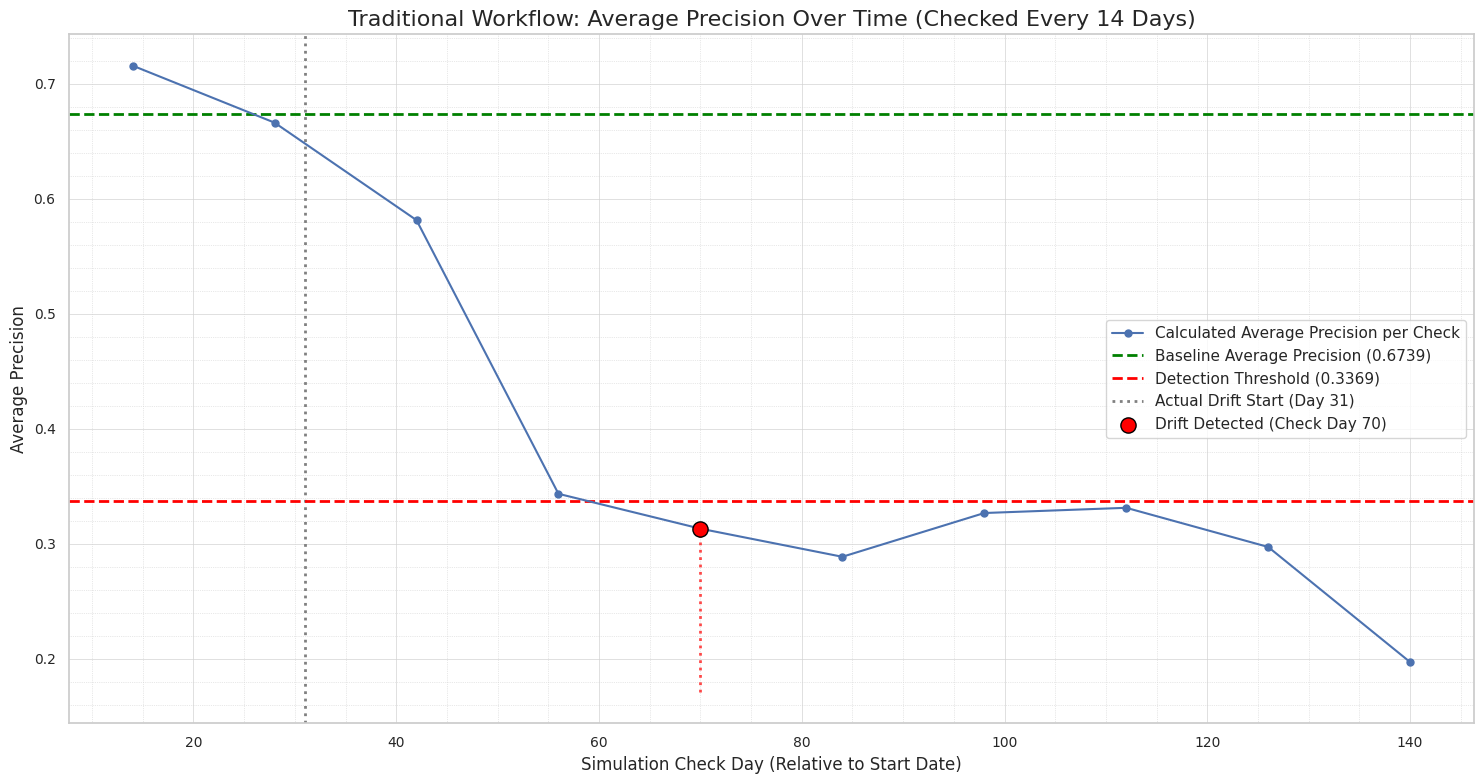

In [45]:
# --- CORRECTED Simulation Script (Minimal Changes to Original Function) ---

import pandas as pd
import numpy as np
import datetime
import time
import joblib # Using joblib as a common way to save sklearn models/pipelines
# Or import mlflow.pyfunc if your model was saved via MLflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import average_precision_score
from typing import List, Dict, Tuple, Any # For type hinting
import warnings

# Suppress SettingWithCopyWarning for cleaner output during simulation
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# --- Configuration ---

# --- FILE PATHS ---
# !!! UPDATE THIS PATH !!!
BASELINE_MODEL_PATH = './model.pkl'  # Path to your saved baseline model artifact

# --- SIMULATION PARAMETERS ---
SIM_START_DATE_STR = '2025-08-15'        # Absolute start date of the drift_data_df
DRIFT_ACTUAL_START_DATE_STR = '2025-09-15' # When drift was introduced in the data generator
CHECK_INTERVAL_DAYS = 14                # How often the "manual" check is performed
LABEL_DELAY_DAYS = 7                    # Delay in getting ground truth labels

# --- PERFORMANCE & THRESHOLD ---
# !!! UPDATE baseline_AP !!!
BASELINE_AP = 0.67389  # Example: Use your actual baseline AP score
# Define threshold (choose one method):
# Method 1: Relative Drop
RELATIVE_DROP_THRESHOLD = 0.50 # Example: A significant 50% drop needed to trigger detection
PERFORMANCE_THRESHOLD_AP = BASELINE_AP * (1 - RELATIVE_DROP_THRESHOLD)
# # Method 2: Absolute Threshold
# PERFORMANCE_THRESHOLD_AP = 0.35 # Example: Fixed threshold
METRIC_TO_TRACK = 'Average Precision'

# --- MODEL FEATURES ---
# !!! UPDATE with your actual features !!!
INPUT_FEATURES = [
    'TX_AMOUNT', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT',
    'CUSTOMER_ID_NB_TX_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW',
    'CUSTOMER_ID_NB_TX_7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW',
    'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW',
    'TERMINAL_ID_NB_TX_1DAY_WINDOW', 'TERMINAL_ID_RISK_1DAY_WINDOW',
    'TERMINAL_ID_NB_TX_7DAY_WINDOW', 'TERMINAL_ID_RISK_7DAY_WINDOW',
    'TERMINAL_ID_NB_TX_30DAY_WINDOW', 'TERMINAL_ID_RISK_30DAY_WINDOW'
]
TARGET_FEATURE = 'TX_FRAUD'
DATE_COLUMN = 'TX_DATETIME'
RELATIVE_DAY_COLUMN = 'TX_TIME_DAYS' # Column name for days relative to SIM_START_DATE_STR

# --- Helper Functions (Keep as before - Taken directly from your code) ---

def load_model(model_path: str) -> Any:
    """Loads the baseline model."""
    print(f"Loading baseline model from: {model_path}")
    try:
        model = joblib.load(model_path)
        print("Model loaded successfully.")
        return model
    except FileNotFoundError:
        print(f"ERROR: Model file not found at {model_path}")
        raise
    except Exception as e:
        print(f"ERROR: Failed to load model: {e}")
        raise

def prepare_data(df: pd.DataFrame, sim_start_date_str: str) -> pd.DataFrame:
    """Prepares the simulation data (assumes df is already loaded)."""
    print("Preparing simulation data...")
    if df is None or df.empty:
         raise ValueError("Input DataFrame 'df' is None or empty.")
    try:
        df_prepared = df.copy()
        # Ensure date column is datetime
        if not pd.api.types.is_datetime64_any_dtype(df_prepared[DATE_COLUMN]):
            print(f"Converting {DATE_COLUMN} to datetime...")
            df_prepared[DATE_COLUMN] = pd.to_datetime(df_prepared[DATE_COLUMN])

        # Ensure relative day column exists or create it relative to sim_start_date_str
        print(f"Checking/Calculating {RELATIVE_DAY_COLUMN} relative to {sim_start_date_str}...")
        sim_start_date = datetime.datetime.strptime(sim_start_date_str, "%Y-%m-%d").date()
        df_prepared[RELATIVE_DAY_COLUMN] = (df_prepared[DATE_COLUMN].dt.date - sim_start_date).apply(lambda x: x.days)
        df_prepared[RELATIVE_DAY_COLUMN] = df_prepared[RELATIVE_DAY_COLUMN].astype(int)
        min_day = df_prepared[RELATIVE_DAY_COLUMN].min()
        max_day = df_prepared[RELATIVE_DAY_COLUMN].max()
        print(f"Column '{RELATIVE_DAY_COLUMN}' processed. Actual Min Day: {min_day}, Actual Max Day: {max_day}")
        if min_day != 0:
             print(f"WARNING: Minimum relative day found is {min_day}, not 0. Data might not start exactly on {sim_start_date_str}.")

        # Sort by date/time just in case
        df_prepared = df_prepared.sort_values(by=DATE_COLUMN).reset_index(drop=True)
        print(f"Data prepared. Shape: {df_prepared.shape}. Sorted by {DATE_COLUMN}.")
        return df_prepared
    except Exception as e:
        print(f"ERROR: Failed to prepare data: {e}")
        raise

def calculate_relative_day(date_str: str, base_date_str: str) -> int:
    """Calculates the number of days between two date strings."""
    try:
        target_date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        base_date = datetime.datetime.strptime(base_date_str, "%Y-%m-%d").date()
        return (target_date - base_date).days
    except ValueError as e:
        print(f"ERROR: Invalid date format for relative day calculation: {e}")
        raise

# --- Main Simulation Function (YOUR ORIGINAL LOGIC with ONLY output dict keys added) ---

def simulate_traditional_detection(
    drift_data_df: pd.DataFrame,
    baseline_model: Any,
    baseline_ap: float,
    performance_threshold_ap: float,
    sim_start_date_str: str,
    drift_actual_start_date_str: str,
    check_interval_days: int, # <-- Input parameter used below
    label_delay_days: int,    # <-- Input parameter used below
    input_features: List[str],
    target_feature: str,
    date_column: str,
    relative_day_column: str
) -> Tuple[Dict[str, Any], pd.DataFrame]:
    """Runs the simulation for the traditional workflow. (Based on user's original logic)"""

    print("\n" + "="*50)
    print(" Starting Traditional Workflow Drift Detection Simulation ")
    print("="*50 + "\n")

    # Calculate the relative day number when drift actually started
    try:
        drift_start_relative_day = calculate_relative_day(drift_actual_start_date_str, sim_start_date_str)
        print(f"Drift introduced in data starting on relative day: {drift_start_relative_day} ({drift_actual_start_date_str})")
    except Exception:
        print("ERROR: Could not calculate drift start relative day. Check dates.")
        return {}, pd.DataFrame() # Return empty if dates are invalid

    T_detect_A_day = None
    TTD_A = float('inf') # Default to infinity if not detected
    min_data_day = drift_data_df[relative_day_column].min()
    max_data_day = drift_data_df[relative_day_column].max()
    periodic_results = [] # To store results from each check

    # Start first check after one interval from simulation start
    current_check_day = check_interval_days

    print(f"Simulation Start Date (Relative Day 0): {sim_start_date_str}")
    print(f"Actual Min Data Day Found: {min_data_day}, Max Data Day Found: {max_data_day}")
    print(f"Initial Baseline AP: {baseline_ap:.4f}")
    print(f"Drift Detection Threshold AP: {performance_threshold_ap:.4f}")
    print(f"Check Interval: {check_interval_days} days, Label Delay: {label_delay_days} days")
    print("-" * 50)

    simulation_start_time = time.time()

    # Loop condition: ensure the *end* of the potential evaluation window
    # doesn't go beyond the last day for which we could possibly have labels.
    last_possible_eval_end_day = max_data_day - label_delay_days

    while True: # Loop will break internally or when condition met

        # 1. Define the evaluation window for THIS check (USER'S ORIGINAL LOGIC)
        start_pred_day = current_check_day - check_interval_days
        end_pred_day = current_check_day - 1
        label_availability_day = end_pred_day - label_delay_days

        # Ensure start day is not negative
        start_eval_day = max(min_data_day, start_pred_day) # Start from actual min data day if needed
        end_eval_day = label_availability_day

        actual_check_date = (datetime.datetime.strptime(sim_start_date_str, "%Y-%m-%d") +
                             datetime.timedelta(days=current_check_day)).strftime('%Y-%m-%d')

        # Exit condition: If the start of the period we need to evaluate is beyond the last day
        # for which labels could be available, stop. (USER'S ORIGINAL LOGIC)
        if start_eval_day > last_possible_eval_end_day:
            print(f"\nStopping simulation loop: Start of next evaluation period (Day {start_eval_day}) "
                  f"is beyond the last day with potentially available labels (Day {last_possible_eval_end_day}).")
            break

        print(f"\n--- Performing Check on Day {current_check_day} ({actual_check_date}) ---")

        # Check if the evaluation window is valid (end >= start)
        if end_eval_day < start_eval_day:
            print(f"  Evaluation window invalid or ends before start (End {end_eval_day} < Start {start_eval_day}). "
                  f"Not enough data/delay passed for this interval. Skipping.")
            status = 'Skipped - Invalid Window'
            current_check_AP = np.nan
            threshold_crossed_this_check = False
            data_points_count = 0
            fraud_count = 0
        else:
            print(f"  Evaluating performance for relative days: {start_eval_day} to {end_eval_day}")

            # 2. Filter data for this evaluation period
            eval_data_for_check = drift_data_df[
                (drift_data_df[relative_day_column] >= start_eval_day) &
                (drift_data_df[relative_day_column] <= end_eval_day)
            ] # No copy needed if just reading

            # 3. Check if data exists for evaluation
            if eval_data_for_check.empty:
                print(f"  No data found with available labels for days {start_eval_day}-{end_eval_day}. Skipping check.")
                status = 'Skipped - No Data'
                current_check_AP = np.nan
                threshold_crossed_this_check = False
                data_points_count = 0
                fraud_count = 0
            else:
                # 4. Make predictions using the BASELINE model
                X_eval = eval_data_for_check[input_features]
                y_true_eval = eval_data_for_check[target_feature]
                data_points_count = len(eval_data_for_check)
                fraud_count = int(y_true_eval.sum()) # Ensure int
                print(f"  Found {data_points_count} data points ({fraud_count} frauds) for evaluation.")

                try:
                    if X_eval.isnull().values.any():
                        print("  Warning: NaNs detected in evaluation features. Attempting prediction...")
                    predictions_proba = baseline_model.predict_proba(X_eval)[:, 1] # Prob of class 1 (Fraud)

                    # 5. Calculate performance metric (Average Precision)
                    current_check_AP = np.nan # Default to NaN
                    threshold_crossed_this_check = False
                    try:
                        if len(y_true_eval.unique()) < 2:
                            print(f"  WARN: Only one class ({y_true_eval.unique()}) present in evaluation window. AP is undefined.")
                            status = "Skipped - Single Class"
                        else:
                            current_check_AP = average_precision_score(y_true_eval, predictions_proba)
                            print(f"  Calculated {METRIC_TO_TRACK} for period: {current_check_AP:.4f}")
                            # 6. Compare to threshold
                            if not pd.isna(current_check_AP) and current_check_AP < performance_threshold_ap:
                                threshold_crossed_this_check = True
                                if T_detect_A_day is None and current_check_day >= drift_start_relative_day:
                                    T_detect_A_day = current_check_day # First detection AFTER drift start
                                    TTD_A = T_detect_A_day - drift_start_relative_day
                                    status = f"Success - Threshold Crossed ({current_check_AP:.4f} < {performance_threshold_ap:.4f}) - DRIFT DETECTED"
                                    print(f"  ***** DRIFT DETECTED on Check Day {T_detect_A_day} ({actual_check_date}) *****")
                                elif T_detect_A_day is not None:
                                     status = f"Success - Threshold Crossed ({current_check_AP:.4f} < {performance_threshold_ap:.4f}) - Drift Already Detected"
                                     print(f"  Threshold crossed, but drift already detected on day {T_detect_A_day}.")
                                else: # Threshold crossed before drift start
                                     status = f"Success - Threshold Crossed ({current_check_AP:.4f} < {performance_threshold_ap:.4f}) - Before Drift Start"
                                     print(f"  Threshold crossed, but before actual drift start day ({drift_start_relative_day}).")
                            elif pd.isna(current_check_AP):
                                 print("  Current AP is NaN, cannot compare to threshold.")
                                 status = "Calculation Resulted in NaN"
                            else:
                                print(f"  AP ({current_check_AP:.4f}) >= threshold ({performance_threshold_ap:.4f}). Threshold OK.")
                                status = "Success - Threshold OK"
                    except Exception as e_calc:
                        print(f"  ERROR calculating AP for this period: {e_calc}")
                        status = f"Calculation Error: {e_calc}"

                except Exception as e_pred:
                    print(f"  ERROR making predictions for this period: {e_pred}. Skipping check.")
                    status = f'Prediction Error: {e_pred}'
                    current_check_AP = np.nan
                    threshold_crossed_this_check = False

        # Store results for this check
        periodic_results.append({
             'Check Day': current_check_day,
             'Check Date': actual_check_date,
             'Eval Start Day': start_eval_day, # Using user's original variable
             'Eval End Day': end_eval_day,     # Using user's original variable
             'Eval Start Date': (datetime.datetime.strptime(sim_start_date_str, "%Y-%m-%d") + datetime.timedelta(days=start_eval_day)).strftime('%Y-%m-%d'),
             'Eval End Date': (datetime.datetime.strptime(sim_start_date_str, "%Y-%m-%d") + datetime.timedelta(days=end_eval_day)).strftime('%Y-%m-%d'),
             'Data Points': data_points_count,
             'Fraud Count': fraud_count,
             'Metric Value (AP)': current_check_AP,
             # Correctly flags if drift was detected *in this check* or any previous check *after* drift start
             'Threshold Crossed (since drift)': (T_detect_A_day is not None and current_check_day >= T_detect_A_day),
             'Status': status
        })

        # Move to the next check day
        current_check_day += check_interval_days

    # --- After the loop ---
    simulation_end_time = time.time()
    print("\n" + "="*50)
    print(" Simulation Complete ")
    print("="*50)
    print(f"Total Simulation Time: {simulation_end_time - simulation_start_time:.2f} seconds")

    # --- MINIMAL CHANGE HERE: Added the missing keys to the output dictionary ---
    final_results_summary = {
        'Detection Mechanism': 'Periodic Performance Check', # Added for summary script consistency
        'Performance Metric': METRIC_TO_TRACK,              # Added for summary script consistency
        'Baseline AP': baseline_ap,
        'Performance Threshold AP': performance_threshold_ap,
        'Check Interval (Days)': check_interval_days,          # <<< ONLY ADDED THIS
        'Label Delay (Days)': label_delay_days,              # <<< ONLY ADDED THIS
        'Drift Start Day (T_drift_start)': drift_start_relative_day,
        'Drift Start Date (Actual)': drift_actual_start_date_str,
        'Detection Day (T_detect_A)': T_detect_A_day if T_detect_A_day is not None else "Not Detected",
        'Detection Date (T_detect_A)': (datetime.datetime.strptime(sim_start_date_str, "%Y-%m-%d") + datetime.timedelta(days=T_detect_A_day)).strftime('%Y-%m-%d') if T_detect_A_day is not None else "N/A",
        'Time To Detect (TTD_A days)': TTD_A if T_detect_A_day is not None else "N/A (Not Detected)",
        'Last Check Day Simulated': current_check_day - check_interval_days # The last day a check was *attempted* (User's original logic)
    }
    # --- END OF MINIMAL CHANGE ---

    if T_detect_A_day is not None:
        print(f"Traditional Drift Detected on Relative Day: {T_detect_A_day}")
        print(f"Actual Detection Check Date: {final_results_summary['Detection Date (T_detect_A)']}")
        print(f"Time To Detect (TTD_A): {TTD_A} days")
    else:
        print(f"Traditional Drift NOT detected within the data timeframe ending relative day {max_data_day}.")

    # Convert periodic results to DataFrame
    results_df = pd.DataFrame(periodic_results)
    if not results_df.empty:
        # Format AP column for better readability in printout
        results_df['Metric Value (AP) Print'] = results_df['Metric Value (AP)'].map(lambda x: f"{x:.4f}" if pd.notna(x) else 'N/A')
    else:
        # Handle empty results case
         results_df['Metric Value (AP) Print'] = []

    return final_results_summary, results_df

# --- Plotting Function (Keep as before - Taken directly from your code) ---
def plot_performance_over_time(results_df: pd.DataFrame, baseline_ap: float, threshold_ap: float, drift_start_day: int, detect_day: Any, metric_col: str = 'Metric Value (AP)', day_col: str = 'Check Day', metric_name: str = 'Average Precision', check_interval_days: int = 14):
    """Plots the performance metric over check intervals."""
    if results_df.empty:
        print("Cannot plot: Results DataFrame is empty.")
        return

    plt.figure(figsize=(15, 8)) # Increased size
    sns.set_theme(style="whitegrid") # Use seaborn themes

    # Convert metric back to numeric for plotting, coercing errors
    plot_metric_values = pd.to_numeric(results_df[metric_col], errors='coerce')
    valid_metric_mask = ~plot_metric_values.isna() # Mask for valid numbers

    # Plot only valid points
    if valid_metric_mask.any():
        plt.plot(results_df.loc[valid_metric_mask, day_col],
                plot_metric_values[valid_metric_mask],
                marker='o', linestyle='-', markersize=5, label=f'Calculated {metric_name} per Check', zorder=3)
    else:
         print("Warning: No valid metric values to plot.")

    # Plot baseline and threshold lines
    plt.axhline(baseline_ap, color='green', linestyle='--', linewidth=2, label=f'Baseline {metric_name} ({baseline_ap:.4f})', zorder=2)
    plt.axhline(threshold_ap, color='red', linestyle='--', linewidth=2, label=f'Detection Threshold ({threshold_ap:.4f})', zorder=2)

    # Add vertical line for actual drift start
    # Safely handle drift_start_day if it's None or non-numeric before plotting
    drift_start_day_num = None
    if drift_start_day is not None:
        try: drift_start_day_num = int(float(drift_start_day))
        except (ValueError, TypeError): pass # Keep as None if conversion fails

    if drift_start_day_num is not None:
        plt.axvline(drift_start_day_num, color='grey', linestyle=':', linewidth=2, label=f'Actual Drift Start (Day {drift_start_day_num})', zorder=1)


    # Mark detection point if detected
    # Safely handle detect_day if it's None or non-numeric before plotting
    detect_day_num = None
    if detect_day is not None and detect_day != "Not Detected":
        try: detect_day_num = int(float(detect_day))
        except (ValueError, TypeError): pass # Keep as None if conversion fails

    if detect_day_num is not None:
        # Find the exact metric value on the detection day for plotting
        detect_row = results_df[results_df[day_col] == detect_day_num]
        if not detect_row.empty:
            detect_y_str = detect_row[metric_col].iloc[0]
            detect_y = pd.to_numeric(detect_y_str, errors='coerce')
            if not pd.isna(detect_y):
                 plt.scatter(detect_day_num, detect_y, color='red', s=120, zorder=5, label=f'Drift Detected (Check Day {detect_day_num})', edgecolors='black')
                 # Safely get y-limits before plotting vline
                 y_min, y_max = plt.ylim()
                 plt.vlines(detect_day_num, y_min, detect_y, color='red', linestyle=':', alpha=0.7, linewidth=2, zorder=1)

    plt.title(f'Traditional Workflow: {metric_name} Over Time (Checked Every {check_interval_days} Days)', fontsize=16)
    plt.xlabel('Simulation Check Day (Relative to Start Date)', fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    plt.legend(fontsize=11)
    plt.xticks(rotation=0, ha='center', fontsize=10) # Adjust rotation if needed
    plt.yticks(fontsize=10)
    plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgrey')
    plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='lightgrey') # Add minor gridlines
    plt.minorticks_on() # Enable minor ticks for finer grid
    plt.tight_layout()
    plt.show()


# --- Execution (for Colab/Notebook - Taken directly from your code) ---

# !! IMPORTANT !!
# Ensure the 'drifted_data_monthly' DataFrame is loaded in your Colab environment before running this cell.

if 'drifted_data_monthly' not in locals() or not isinstance(drifted_data_monthly, pd.DataFrame):
    print("ERROR: DataFrame 'drifted_data_monthly' is not loaded or not a DataFrame.")
    print("Please load your data into a DataFrame named 'drifted_data_monthly' before running this.")
    # Define dummy variables so the results summary script doesn't immediately fail
    final_summary_results = {}
    periodic_results_table = pd.DataFrame()
else:
    print(f"Using pre-loaded DataFrame 'drifted_data_monthly' with shape: {drifted_data_monthly.shape}")
    try:
        # 1. Prepare Data (Run this once)
        prepared_drift_data = prepare_data(drifted_data_monthly, SIM_START_DATE_STR)

        # Add a check after preparation
        min_day_check = prepared_drift_data[RELATIVE_DAY_COLUMN].min()
        max_day_check = prepared_drift_data[RELATIVE_DAY_COLUMN].max()
        print(f"VERIFICATION: Min Relative Day in prepared data: {min_day_check}, Max Relative Day: {max_day_check}")
        if max_day_check < LABEL_DELAY_DAYS + CHECK_INTERVAL_DAYS: # Check if enough data exists for even one check period calculation based on original logic
             print(f"WARNING: Max data day ({max_day_check}) is less than the time needed for the first check interval's label availability (approx Day {CHECK_INTERVAL_DAYS + LABEL_DELAY_DAYS}). First check(s) might find no data.")

        # 2. Load Model (Run this once)
        baseline_model_object = load_model(BASELINE_MODEL_PATH)

        # 3. Run Simulation (Using the minimally modified function above)
        final_summary_results, periodic_results_table = simulate_traditional_detection(
            drift_data_df=prepared_drift_data,
            baseline_model=baseline_model_object,
            baseline_ap=BASELINE_AP,
            performance_threshold_ap=PERFORMANCE_THRESHOLD_AP,
            sim_start_date_str=SIM_START_DATE_STR,
            drift_actual_start_date_str=DRIFT_ACTUAL_START_DATE_STR,
            check_interval_days=CHECK_INTERVAL_DAYS,
            label_delay_days=LABEL_DELAY_DAYS,
            input_features=INPUT_FEATURES,
            target_feature=TARGET_FEATURE,
            date_column=DATE_COLUMN,
            relative_day_column=RELATIVE_DAY_COLUMN
        )

        # 4. Display Results
        print("\n--- Final Summary ---")
        # Pretty print the summary dictionary
        for key, value in final_summary_results.items():
            # Simple formatting for display
            value_str = f"{value:.4f}" if isinstance(value, float) and 'AP' in key else str(value)
            print(f"  {key:<30}: {value_str}")


        print("\n--- Periodic Check Results Table ---")
        # Display the full table
        if not periodic_results_table.empty:
            with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 120):
                 # Use the print-formatted column, rename for clarity
                 print(periodic_results_table.drop(columns=['Metric Value (AP)'])
                       .rename(columns={'Metric Value (AP) Print':'Metric Value (AP)'})
                       .to_markdown(index=False, numalign="left", stralign="left")) # Use markdown
        else:
            print("  Periodic results table is empty.")


        # 5. Plot Results
        plot_performance_over_time(
            results_df=periodic_results_table,
            baseline_ap=BASELINE_AP,
            threshold_ap=PERFORMANCE_THRESHOLD_AP,
            drift_start_day=final_summary_results.get('Drift Start Day (T_drift_start)'), # Pass raw value
            detect_day=final_summary_results.get('Detection Day (T_detect_A)'), # Pass raw value
            metric_name=METRIC_TO_TRACK,
            check_interval_days=CHECK_INTERVAL_DAYS # Pass interval to plotter
        )

    except NameError as ne:
        print(f"\nEXECUTION ERROR: Required object not found: {ne}")
        print("Ensure 'drifted_data_monthly' is loaded and BASELINE_MODEL_PATH is correct.")
    except FileNotFoundError as fnf:
         print(f"\nEXECUTION ERROR: File not found: {fnf}")
         print(f"Please ensure the model exists at: {BASELINE_MODEL_PATH}")
    except KeyError as ke:
        print(f"\nEXECUTION ERROR: Missing column in DataFrame: {ke}")
        print(f"Please ensure the columns {INPUT_FEATURES + [TARGET_FEATURE, DATE_COLUMN]} exist in 'drifted_data_monthly'.")
    except Exception as main_e:
        print(f"\nAn error occurred during the main execution block: {main_e}")
        import traceback
        traceback.print_exc()

--- Starting MLOps Simulation Execution ---

Using pre-loaded 'training_df' with shape: (622892, 23)
Using pre-loaded 'drifted_data_monthly' with shape: (50000, 23)
--- Preparing Training Data ---
  Note: Using existing 'TX_TIME_DAYS' for Training Data.
  Checking/imputing NaNs in monitored features...
  No NaNs found in monitored features.
  Training Data prepared. Final Shape: (622892, 23). Sorted by TX_DATETIME.
--- Finished Preparing Training Data ---
--- Preparing Drift Data ---
  Calculating TX_TIME_DAYS relative to 2025-08-15...
  Column 'TX_TIME_DAYS' processed. Actual Min Day: 0, Actual Max Day: 133
  Checking/imputing NaNs in monitored features...
  No NaNs found in monitored features.
  Drift Data prepared. Final Shape: (50000, 23). Sorted by TX_DATETIME.
--- Finished Preparing Drift Data ---

--- Data Verification Post-Preparation ---

 Starting MLOps Workflow Data Drift Detection Simulation 
 Check Interval: 7 day(s)

Monitoring Numerical Features: ['TX_AMOUNT', 'TX_DURING

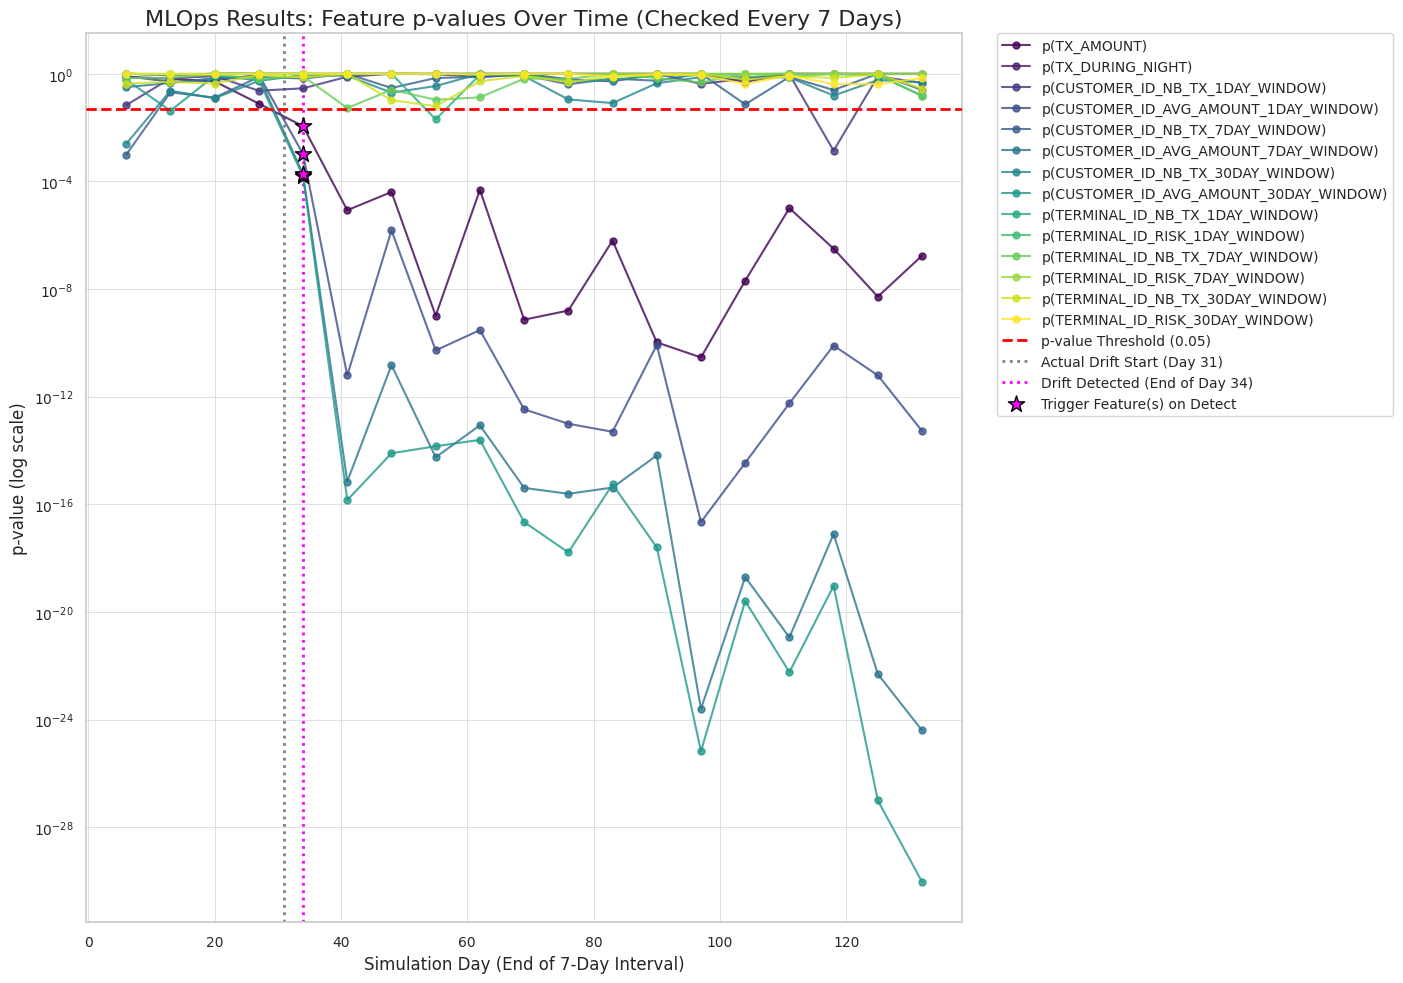


--- Placeholder for Traditional Simulation Results ---
  Using example T_detect_A: 65

--- Plotting Drift Detection Timeline Comparison ---


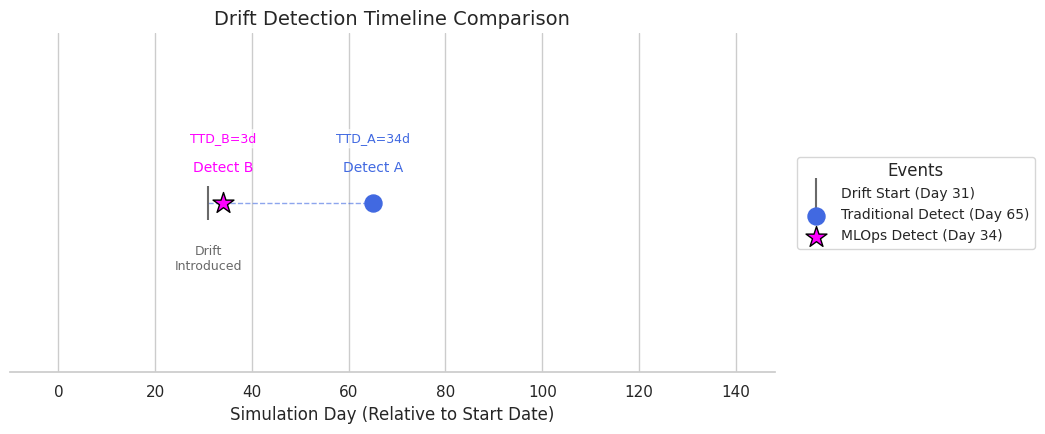


--- MLOps Simulation Script Finished ---


In [48]:
import pandas as pd
import numpy as np
import datetime
import time
# import joblib # No model loading needed for MLOps sim
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, chi2_contingency
from sklearn.preprocessing import OrdinalEncoder # For categorical drift check
from typing import List, Dict, Tuple, Any
import warnings
import traceback # Keep for error handling

warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings('ignore', category=UserWarning) # Suppress Chi2 low frequency warnings if desired

# --- HELPER FUNCTIONS (ADAPTED FROM data-model-drift/utils.py or data_drift.py) ---
def contingency_table(reference_col, current_col):
    """Creates a contingency table for Chi-squared test."""
    # Ensure input are pandas Series for value_counts()
    ref_series = pd.Series(reference_col)
    curr_series = pd.Series(current_col)

    # Combine unique values, handle potential NaNs if they exist after imputation/dropna
    ref_unique = ref_series.dropna().unique()
    curr_unique = curr_series.dropna().unique()
    all_categories = pd.unique(np.concatenate((ref_unique, curr_unique), axis=0))

    ref_counts = ref_series.value_counts().reindex(all_categories, fill_value=0)
    curr_counts = curr_series.value_counts().reindex(all_categories, fill_value=0)

    # Create the contingency table as a 2D numpy array
    table = np.array([ref_counts.values, curr_counts.values])
    return table

# --- Configuration ---
# --- FILE PATHS ---
# NO LONGER NEEDED AS DATAFRAMES ARE LOADED

# --- SIMULATION PARAMETERS ---
SIM_START_DATE_STR = '2025-08-15'        # Absolute start date of the drifted_data_monthly
DRIFT_ACTUAL_START_DATE_STR = '2025-09-15' # When drift was introduced
MLOPS_CHECK_INTERVAL_DAYS = 7           # How often the MLOps check runs (e.g., 1 for daily)
# LABEL_DELAY_DAYS is NOT relevant for MLOps data drift detection

# --- STATISTICAL THRESHOLD ---
P_VALUE_THRESHOLD = 0.05 # Typical threshold for statistical significance

# --- FEATURES ---
# Features used in your model AND that you want to monitor for drift
FEATURES_TO_MONITOR = [
    'TX_AMOUNT', 'TX_DURING_NIGHT',
    'CUSTOMER_ID_NB_TX_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW',
    'CUSTOMER_ID_NB_TX_7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW',
    'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW',
    'TERMINAL_ID_NB_TX_1DAY_WINDOW', 'TERMINAL_ID_RISK_1DAY_WINDOW',
    'TERMINAL_ID_NB_TX_7DAY_WINDOW', 'TERMINAL_ID_RISK_7DAY_WINDOW',
    'TERMINAL_ID_NB_TX_30DAY_WINDOW', 'TERMINAL_ID_RISK_30DAY_WINDOW'
]
DATE_COLUMN = 'TX_DATETIME'
RELATIVE_DAY_COLUMN = 'TX_TIME_DAYS' # Column name for days relative to SIM_START_DATE_STR

# --- Data Preparation Function (Updated for clarity) ---
def prepare_data(df: pd.DataFrame, sim_start_date_str: str, df_name:str = "Data", calculate_relative_days: bool = True) -> pd.DataFrame:
    """Prepares the simulation data (assumes df is already loaded)."""
    print(f"--- Preparing {df_name} ---")
    if df is None or df.empty:
        raise ValueError(f"Input DataFrame '{df_name}' is None or empty.")
    try:
        df_prepared = df.copy()
        # Ensure date column is present and datetime
        if DATE_COLUMN not in df_prepared.columns:
             raise ValueError(f"Required date column '{DATE_COLUMN}' not found in {df_name}.")
        if not pd.api.types.is_datetime64_any_dtype(df_prepared[DATE_COLUMN]):
            print(f"  Converting {DATE_COLUMN} to datetime...")
            df_prepared[DATE_COLUMN] = pd.to_datetime(df_prepared[DATE_COLUMN])

        # Calculate relative day column if requested (usually only for drift data)
        if calculate_relative_days:
            print(f"  Calculating {RELATIVE_DAY_COLUMN} relative to {sim_start_date_str}...")
            sim_start_date = datetime.datetime.strptime(sim_start_date_str, "%Y-%m-%d").date()
            df_prepared[RELATIVE_DAY_COLUMN] = (df_prepared[DATE_COLUMN].dt.date - sim_start_date).apply(lambda x: x.days)
            df_prepared[RELATIVE_DAY_COLUMN] = df_prepared[RELATIVE_DAY_COLUMN].astype(int)
            min_day = df_prepared[RELATIVE_DAY_COLUMN].min()
            max_day = df_prepared[RELATIVE_DAY_COLUMN].max()
            print(f"  Column '{RELATIVE_DAY_COLUMN}' processed. Actual Min Day: {min_day}, Actual Max Day: {max_day}")
            if min_day != 0 and df_name == "Drift Data":
                 print(f"  WARNING: Minimum relative day found is {min_day}, not 0. Data might not start exactly on {sim_start_date_str}.")
        else:
             # Ensure the column exists if needed elsewhere, but don't calculate
             if RELATIVE_DAY_COLUMN not in df_prepared.columns:
                  print(f"  Note: '{RELATIVE_DAY_COLUMN}' not calculated/found for {df_name} (Reference).")
             else:
                  print(f"  Note: Using existing '{RELATIVE_DAY_COLUMN}' for {df_name}.")

        # Impute missing values (example - adjust strategy as needed)
        print(f"  Checking/imputing NaNs in monitored features...")
        imputed_cols_count = 0
        for col in FEATURES_TO_MONITOR:
            if col in df_prepared.columns and df_prepared[col].isnull().any():
                imputed_cols_count += 1
                if pd.api.types.is_numeric_dtype(df_prepared[col]):
                    median_val = df_prepared[col].median()
                    df_prepared[col].fillna(median_val, inplace=True)
                elif pd.api.types.is_categorical_dtype(df_prepared[col]) or df_prepared[col].dtype == 'object':
                     mode_val = df_prepared[col].mode()
                     fallback_val = 'Unknown' # Define a fallback
                     fill_val = fallback_val if mode_val.empty else mode_val[0]
                     df_prepared[col].fillna(fill_val, inplace=True)
                else: # Fallback for other types
                     mode_val = df_prepared[col].mode()
                     fallback_val = 0 # Example fallback for other types
                     fill_val = fallback_val if mode_val.empty else mode_val[0]
                     df_prepared[col].fillna(fill_val, inplace=True)
        if imputed_cols_count > 0:
            print(f"  Imputed NaNs in {imputed_cols_count} monitored feature columns.")
        else:
            print(f"  No NaNs found in monitored features.")

        # Sort by date/time just in case
        df_prepared = df_prepared.sort_values(by=DATE_COLUMN).reset_index(drop=True)
        print(f"  {df_name} prepared. Final Shape: {df_prepared.shape}. Sorted by {DATE_COLUMN}.")
        print(f"--- Finished Preparing {df_name} ---")
        return df_prepared
    except Exception as e:
        print(f"ERROR: Failed to prepare {df_name}: {e}")
        traceback.print_exc()
        raise

def calculate_relative_day(date_str: str, base_date_str: str) -> int:
    """Calculates the number of days between two date strings."""
    try:
        target_date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        base_date = datetime.datetime.strptime(base_date_str, "%Y-%m-%d").date()
        return (target_date - base_date).days
    except ValueError as e:
        print(f"ERROR: Invalid date format for relative day calculation: {e}")
        raise

# --- Main MLOps Simulation Function ---

def simulate_mlops_detection(
    training_df: pd.DataFrame, # Expects PREPARED reference data
    drift_data_df: pd.DataFrame, # Expects PREPARED drift data
    features_to_monitor: List[str],
    p_value_threshold: float,
    sim_start_date_str: str,
    drift_actual_start_date_str: str,
    check_interval_days: int, # NEW Parameter
    relative_day_column: str
) -> Tuple[Dict[str, Any], pd.DataFrame]:
    """Runs the MLOps data drift detection simulation with check intervals."""

    print("\n" + "="*60)
    print(" Starting MLOps Workflow Data Drift Detection Simulation ")
    print(f" Check Interval: {check_interval_days} day(s)")
    print("="*60 + "\n")

    # DataFrames are already prepared (including imputation)

    # Identify column types from reference data
    reference_data_prepared = training_df[features_to_monitor] # Select monitored features
    numerical_features = reference_data_prepared.select_dtypes(include=np.number).columns.tolist()
    categorical_features = reference_data_prepared.select_dtypes(exclude=np.number).columns.tolist()
    print(f"Monitoring Numerical Features: {numerical_features}")
    print(f"Monitoring Categorical Features: {categorical_features}")

    # Calculate the relative day number when drift actually started
    try:
        drift_start_relative_day = calculate_relative_day(drift_actual_start_date_str, sim_start_date_str)
        print(f"Drift introduced in source data starting on relative day: {drift_start_relative_day} ({drift_actual_start_date_str})")
    except Exception:
        print("ERROR: Could not calculate drift start relative day. Check dates.")
        return {}, pd.DataFrame()

    T_detect_B_day = None
    TTD_B = float('inf')
    triggering_features_first_detection = []
    if relative_day_column not in drift_data_df.columns:
         raise ValueError(f"'{relative_day_column}' not found in the prepared drift data.")
    min_data_day = drift_data_df[relative_day_column].min()
    max_data_day = drift_data_df[relative_day_column].max()
    periodic_results = [] # Store results from each CHECK

    print(f"Simulation Start Date (Relative Day {min_data_day}): {sim_start_date_str}")
    print(f"Actual Drift Data Range (Relative Days): {min_data_day} to {max_data_day}")
    print(f"Drift Detection p-value Threshold: {p_value_threshold}")
    print("-" * 60)

    simulation_start_time = time.time()

    # --- Periodic Check Loop ---
    # Start checks from the beginning of the simulation data
    current_check_day = min_data_day + check_interval_days -1 # Day number for the *end* of the first interval

    while current_check_day <= max_data_day:
        # Define the window for this check
        start_day_window = current_check_day - check_interval_days + 1
        end_day_window = current_check_day

        # Ensure start day isn't before the actual minimum day
        start_day_window = max(min_data_day, start_day_window)

        actual_check_date_dt = datetime.datetime.strptime(sim_start_date_str, "%Y-%m-%d") + datetime.timedelta(days=end_day_window)
        actual_check_date_str = actual_check_date_dt.strftime('%Y-%m-%d')
        actual_window_start_date_str = (datetime.datetime.strptime(sim_start_date_str, "%Y-%m-%d") + datetime.timedelta(days=start_day_window)).strftime('%Y-%m-%d')


        print(f"\n--- Performing Check for Window Ending Day {end_day_window} ({actual_window_start_date_str} to {actual_check_date_str}) ---")

        # 1. Get data for the current window
        current_window_data = drift_data_df[
            (drift_data_df[relative_day_column] >= start_day_window) &
            (drift_data_df[relative_day_column] <= end_day_window)
        ]

        if current_window_data.empty:
            print(f"  No data available for days {start_day_window}-{end_day_window}. Skipping check.")
            # Add a basic result row indicating skipped check
            periodic_results.append({'Check End Day': end_day_window, 'Check End Date': actual_check_date_str, 'Status': 'Skipped - No Data'})
            # Move to the next check interval
            current_check_day += check_interval_days
            continue # Skip to next iteration

        print(f"  Data points in window: {len(current_window_data)}")

        drift_detected_this_check = False
        check_p_values = {'Check End Day': end_day_window, 'Check End Date': actual_check_date_str, 'Status':'OK'}
        features_crossed_this_check = []

        # 2. Check each feature against reference data using the WINDOW's data
        for feature in features_to_monitor:
            reference_feature_data = reference_data_prepared[feature] # Already prepared
            current_feature_data = current_window_data[feature]

            if current_feature_data.empty or reference_feature_data.empty:
                 # print(f"  Feature '{feature}': No valid data for comparison in window. Skipping.")
                 check_p_values[f'{feature}_p_value'] = np.nan
                 check_p_values[f'{feature}_drifted'] = False
                 continue

            p_value = np.nan
            test_type = "N/A"

            try:
                if feature in numerical_features:
                    test_type = "KS"
                    if len(np.unique(reference_feature_data)) > 1 and len(np.unique(current_feature_data)) > 1:
                        statistic, p_value = ks_2samp(reference_feature_data.values, current_feature_data.values)
                    else:
                        # print(f"  Feature '{feature}': One or both datasets constant. KS test skipped.")
                        p_value = 1.0

                elif feature in categorical_features:
                    test_type = "Chi2"
                    if len(reference_feature_data) > 0 and len(current_feature_data) > 0:
                        contingency = contingency_table(reference_feature_data, current_feature_data)
                        # Add robust check for contingency table validity
                        if contingency.shape[0]==2 and contingency.shape[1]>0 and np.all(contingency.sum(axis=1)>0) and np.all(contingency.sum(axis=0)>0):
                             chi2_stat, p_val_chi, dof, expected = chi2_contingency(contingency, correction=False)
                             # if np.any(expected < 5): print(f"  WARN Feature '{feature}': Chi2 expected freq < 5.")
                             p_value = p_val_chi
                        else:
                            # print(f"  Feature '{feature}': Contingency table invalid. Chi2 skipped.")
                            p_value = 1.0
                    else:
                        # print(f"  Feature '{feature}': Empty data. Chi2 skipped.")
                        p_value = 1.0

                check_p_values[f'{feature}_p_value'] = p_value

                # 3. Check threshold
                drifted = False
                if not pd.isna(p_value) and p_value < p_value_threshold:
                    drifted = True
                    drift_detected_this_check = True # Flag drift for the *check interval*
                    features_crossed_this_check.append(feature)
                    # print(f"  DRIFT INDICATED in '{feature}' ({test_type} p-value: {p_value:.4e} < {p_value_threshold})")
                # elif not pd.isna(p_value):
                    # print(f"  No drift in '{feature}' ({test_type} p-value: {p_value:.4e})")

                check_p_values[f'{feature}_drifted'] = drifted

            except Exception as e:
                print(f"  ERROR during test for '{feature}': {e}")
                check_p_values[f'{feature}_p_value'] = np.nan
                check_p_values[f'{feature}_drifted'] = False

        periodic_results.append(check_p_values) # Store results for the check interval

        # 4. Update overall detection if this is the first check *after drift start* where drift is seen
        if drift_detected_this_check and T_detect_B_day is None and end_day_window >= drift_start_relative_day:
            T_detect_B_day = end_day_window # Drift detected at the end of this interval
            TTD_B = T_detect_B_day - drift_start_relative_day
            triggering_features_first_detection = sorted(list(set(features_crossed_this_check)))
            check_p_values['Status'] = 'First Drift Detected' # Update status for this check
            print(f"\n***** MLOps Drift First Detected at end of Day {T_detect_B_day} ({actual_check_date_str}) via feature(s): {triggering_features_first_detection} *****")
            # Keep looping to see if p-values recover or other features drift later


        # Move to the next check day
        current_check_day += check_interval_days


    # --- After the loop ---
    simulation_end_time = time.time()
    print("\n" + "="*60)
    print(" MLOps Simulation Complete ")
    print("="*60)
    print(f"Total Simulation Time: {simulation_end_time - simulation_start_time:.2f} seconds")

    final_results_summary = {
        'Check Interval (Days)': check_interval_days,
        'P-Value Threshold': p_value_threshold,
        'Drift Start Day (T_drift_start)': drift_start_relative_day,
        'Drift Start Date (Actual)': drift_actual_start_date_str,
        'Detection Day (T_detect_B)': T_detect_B_day if T_detect_B_day is not None else "Not Detected",
        'Detection Date (T_detect_B)': (datetime.datetime.strptime(sim_start_date_str, "%Y-%m-%d") + datetime.timedelta(days=T_detect_B_day)).strftime('%Y-%m-%d') if T_detect_B_day is not None else "N/A",
        'Time To Detect (TTD_B days)': TTD_B if T_detect_B_day is not None else "N/A (Not Detected)",
        'Triggering Features (First Detection)': triggering_features_first_detection if T_detect_B_day is not None else [],
        'Last Check Day Simulated': current_check_day - check_interval_days # The end day of the last completed check interval
    }

    # ...(rest of the summary printing as before)...
    if T_detect_B_day is not None:
        print(f"MLOps Drift Detected on Relative Day: {T_detect_B_day}")
        print(f"Actual Detection Date (End of Interval): {final_results_summary['Detection Date (T_detect_B)']}")
        print(f"Time To Detect (TTD_B): {TTD_B} days")
        print(f"Triggering Feature(s) on Detection Day: {triggering_features_first_detection}")
    else:
        print(f"MLOps Drift NOT detected within the simulation timeframe ending relative day {max_data_day}.")

    # Convert periodic results to DataFrame
    results_df = pd.DataFrame(periodic_results)
    # Reorder columns for better readability (optional)
    cols_order = ['Check End Day', 'Check End Date', 'Status'] + sorted([c for c in results_df.columns if c not in ['Check End Day', 'Check End Date', 'Status']])
    results_df = results_df[cols_order]

    return final_results_summary, results_df


# --- Plotting Functions ---

def plot_p_values_over_time(results_df: pd.DataFrame, features: List[str], threshold: float, drift_start_day: int, detect_day: Any, trigger_features: List[str], check_interval_days: int):
    """Plots p-values over time for monitored features based on check intervals."""
    if results_df.empty:
        print("Cannot plot: MLOps results DataFrame is empty.")
        return

    plt.figure(figsize=(18, 10)) # Larger figure
    sns.set_theme(style="whitegrid")

    # Use 'Check End Day' for x-axis
    day_col = 'Check End Day'

    plot_features = [f for f in features if f'{f}_p_value' in results_df.columns]
    if not plot_features:
         print("No p-value columns found in results to plot.")
         return
    colors = plt.cm.viridis(np.linspace(0, 1, len(plot_features)))

    print(f"\nPlotting p-values for features: {plot_features} (Interval: {check_interval_days} days)")

    lines_plotted = []
    legend_handles = []

    for i, feature in enumerate(plot_features):
        p_value_col = f'{feature}_p_value'
        # Ensure the day column exists and use it
        if day_col not in results_df.columns:
             print(f"ERROR: Column '{day_col}' not found in results_df.")
             return
        days = results_df[day_col]
        p_values = pd.to_numeric(results_df[p_value_col], errors='coerce')
        valid_mask = ~p_values.isna()

        if valid_mask.any():
            # Plotting check results - connect points based on check intervals
            line, = plt.plot(days[valid_mask], p_values[valid_mask],
                     marker='o', linestyle='-', markersize=5, label=f"p({feature})", color=colors[i], alpha=0.8)
            lines_plotted.append(line)
            legend_handles.append(line)

    if not lines_plotted:
         # ...(handle no valid p-values to plot)...
         return

    # Threshold line
    thresh_line, = plt.plot([], [], color='red', linestyle='--', linewidth=2, label=f'p-value Threshold ({threshold})')
    plt.axhline(threshold, color='red', linestyle='--', linewidth=2, zorder=10)
    legend_handles.append(thresh_line)

    # Drift start line
    drift_start_line, = plt.plot([],[], color='grey', linestyle=':', linewidth=2, label=f'Actual Drift Start (Day {drift_start_day})')
    plt.axvline(drift_start_day, color='grey', linestyle=':', linewidth=2, zorder=1)
    legend_handles.append(drift_start_line)

    # Detection point and line
    if detect_day is not None and detect_day != "Not Detected":
        detect_line, = plt.plot([], [], color='magenta', linestyle=':', linewidth=2, label=f'Drift Detected (End of Day {detect_day})')
        plt.axvline(detect_day, color='magenta', linestyle=':', linewidth=2, zorder=1)
        legend_handles.append(detect_line)

        # Highlight the triggering feature(s) on the detection day check
        detect_day_data = results_df[results_df[day_col] == detect_day]
        plotted_trigger_markers = False
        if not detect_day_data.empty:
            for feature in trigger_features: # Use the stored trigger_features list
                p_val_col = f'{feature}_p_value'
                if p_val_col in detect_day_data:
                    p_val_at_detect = pd.to_numeric(detect_day_data[p_val_col].iloc[0], errors='coerce')
                    if not pd.isna(p_val_at_detect):
                        scatter_handle = plt.scatter(detect_day, p_val_at_detect, color='magenta', s=150, zorder=15, marker='*', edgecolors='black', label='_nolegend_')
                        if not plotted_trigger_markers:
                             dummy_scatter = plt.scatter([], [], color='magenta', s=150, marker='*', edgecolors='black', label=f'Trigger Feature(s) on Detect')
                             legend_handles.append(dummy_scatter)
                             plotted_trigger_markers = True

    plt.yscale('log') # Log scale
    plt.title(f'MLOps Results: Feature p-values Over Time (Checked Every {check_interval_days} Days)', fontsize=16)
    plt.xlabel(f'Simulation Day (End of {check_interval_days}-Day Interval)', fontsize=12)
    plt.ylabel('p-value (log scale)', fontsize=12)
    plt.legend(handles=legend_handles, bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0., fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgrey')
    plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='lightgrey')
    plt.tight_layout(rect=[0, 0, 0.80, 1])
    plt.show()


def plot_drift_detection_point(drift_start_day: int, detect_day_A: Any, detect_day_B: Any, sim_start_date_str: str, max_day: int):
    """Plots the drift start and detection points for both workflows, adjusting label positions."""

    plt.figure(figsize=(13, 4.5)) # Adjusted size for better spacing
    sns.set_theme(style="whitegrid")

    # --- Calculate TTD values cleanly ---
    ttd_a_val = "N/A"
    detect_day_A_num = None
    if isinstance(detect_day_A, (int, float)) and not pd.isna(detect_day_A) and isinstance(drift_start_day, (int, float)):
        detect_day_A_num = int(detect_day_A) # Ensure integer for display
        ttd_a_val = detect_day_A_num - drift_start_day

    ttd_b_val = "N/A"
    detect_day_B_num = None
    if isinstance(detect_day_B, (int, float)) and not pd.isna(detect_day_B) and isinstance(drift_start_day, (int, float)):
        detect_day_B_num = int(detect_day_B) # Ensure integer for display
        ttd_b_val = detect_day_B_num - drift_start_day

    # --- Plotting points ---
    y_pos = 0 # Base Y position for markers

    # Define vertical offsets for text (increase these significantly)
    offset_drift_text = -0.15  # Below marker
    offset_detect_a_text = 0.1   # Above marker A
    offset_detect_b_text = 0.1   # Above marker B (same level as A text initially)
    # offset_ttd_a_text = -0.15  # Original: Below marker A
    offset_ttd_a_text = 0.25   # MODIFIED: Further above marker A, same level as TTD_B
    offset_ttd_b_text = 0.25   # Further above marker B

    # --- Drift Start ---
    plt.scatter(drift_start_day, y_pos, marker='|', s=600, color='dimgrey', label=f'Drift Start (Day {drift_start_day})', zorder=5)
    plt.text(drift_start_day, y_pos + offset_drift_text, 'Drift\nIntroduced', ha='center', va='top', fontsize=9, color='dimgrey')

    # --- Traditional Detection (A) ---
    if detect_day_A_num is not None:
        plt.scatter(detect_day_A_num, y_pos, marker='o', s=150, color='royalblue', label=f'Traditional Detect (Day {detect_day_A_num})', zorder=5)
        plt.text(detect_day_A_num, y_pos + offset_detect_a_text, 'Detect A', ha='center', va='bottom', fontsize=10, color='royalblue')
        # Line from drift start to detect A
        plt.hlines(y_pos, drift_start_day, detect_day_A_num, color='royalblue', linestyle='--', linewidth=1, alpha=0.6, zorder=1)
        # Position TTD label above the marker A, aligned with TTD_B
        # CHANGE: Modified y-coordinate offset and va
        plt.text(detect_day_A_num, y_pos + offset_ttd_a_text, f'TTD_A={ttd_a_val}d', ha='center', va='top', fontsize=9, color='royalblue', bbox=dict(facecolor='white', alpha=0.6, pad=0.1, boxstyle='round,pad=0.2'))

    # --- MLOps Detection (B) ---
    if detect_day_B_num is not None:
        plt.scatter(detect_day_B_num, y_pos, marker='*', s=250, color='magenta', label=f'MLOps Detect (Day {detect_day_B_num})', zorder=6, edgecolors='black')
        # Position text clearly above marker B
        plt.text(detect_day_B_num, y_pos + offset_detect_b_text, 'Detect B', ha='center', va='bottom', fontsize=10, color='magenta')
        # Line from drift start to detect B (adjust if needed, not drawn in example)
        # plt.hlines(y_pos, drift_start_day, detect_day_B_num, color='magenta', linestyle=':', linewidth=1, alpha=0.6, zorder=1) # Uncomment if line desired
        # Position TTD label clearly above B
        plt.text(detect_day_B_num, y_pos + offset_ttd_b_text, f'TTD_B={ttd_b_val}d', ha='center', va='top', fontsize=9, color='magenta', bbox=dict(facecolor='white', alpha=0.6, pad=0.1, boxstyle='round,pad=0.2'))


    # --- Set limits and labels ---
    plt.xlim(min(-10, drift_start_day - 15), max_day + 15) # Increased padding
    plt.ylim(-0.6, 0.6) # Increased vertical limits significantly
    plt.xlabel('Simulation Day (Relative to Start Date)', fontsize=12)
    plt.title('Drift Detection Timeline Comparison', fontsize=14)

    # Remove y-axis ticks and labels for simplicity
    plt.yticks([])
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['bottom'].set_position('zero') # Optionally center bottom spine

    # Add legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10, frameon=True, title="Events", title_fontsize='12') # Added title to legend and font size

    plt.tight_layout(rect=[0, 0, 0.82, 1]) # Adjust right margin more for legend
    plt.show()



# --- Execution ---
# Assumes 'training_df' and 'drifted_data_monthly' DataFrames are loaded in the environment

print("--- Starting MLOps Simulation Execution ---")

# Verify dataframes exist
if 'training_df' not in locals() or not isinstance(training_df, pd.DataFrame):
     print("\nERROR: DataFrame 'training_df' not loaded or is not a DataFrame.")
elif 'drifted_data_monthly' not in locals() or not isinstance(drifted_data_monthly, pd.DataFrame):
     print("\nERROR: DataFrame 'drifted_data_monthly' not loaded or is not a DataFrame.")
else:
    print(f"\nUsing pre-loaded 'training_df' with shape: {training_df.shape}")
    print(f"Using pre-loaded 'drifted_data_monthly' with shape: {drifted_data_monthly.shape}")

    # Store results from both simulations
    mlops_results = {}
    traditional_results = {} # Assuming you run the traditional sim separately and store its summary here

    try:
        # 1. Prepare Data
        prepared_training_data = prepare_data(training_df, SIM_START_DATE_STR, df_name="Training Data", calculate_relative_days=False)
        prepared_drift_data_mlops = prepare_data(drifted_data_monthly, SIM_START_DATE_STR, df_name="Drift Data", calculate_relative_days=True)

        # --- Verification (same as before) ---
        print("\n--- Data Verification Post-Preparation ---")
        # ...(verification checks)...
        if RELATIVE_DAY_COLUMN not in prepared_drift_data_mlops.columns:
             raise ValueError(f"'{RELATIVE_DAY_COLUMN}' missing after preparation.")
        max_day_simulated = prepared_drift_data_mlops[RELATIVE_DAY_COLUMN].max()
        # --- End Verification ---

        # 2. Run MLOps Simulation
        mlops_final_summary, mlops_daily_results_table = simulate_mlops_detection(
            training_df=prepared_training_data,
            drift_data_df=prepared_drift_data_mlops,
            features_to_monitor=FEATURES_TO_MONITOR,
            p_value_threshold=P_VALUE_THRESHOLD,
            sim_start_date_str=SIM_START_DATE_STR,
            drift_actual_start_date_str=DRIFT_ACTUAL_START_DATE_STR,
            check_interval_days=MLOPS_CHECK_INTERVAL_DAYS, # Pass interval
            relative_day_column=RELATIVE_DAY_COLUMN
        )
        mlops_results = mlops_final_summary # Store for comparison plot

        # 3. Display MLOps Results
        print("\n--- MLOps Simulation Final Summary ---")
        # ...(summary printing)...
        for key, value in mlops_final_summary.items():
             if isinstance(value, float) and value != float('inf'):
                   print(f"  {key:<35}: {value:.4f}") # Increased width
             else:
                   print(f"  {key:<35}: {value}")


        print("\n--- MLOps Simulation Periodic Check Results (Sample) ---")
        with pd.option_context('display.max_rows', 20, 'display.max_columns', None, 'display.width', 180):
            # ...(p-value formatting and table printing)...
            p_val_cols = [col for col in mlops_daily_results_table.columns if '_p_value' in col]
            df_display = mlops_daily_results_table.copy()
            for col in p_val_cols:
                 df_display[col] = df_display[col].apply(
                     lambda x: f"{x:.3e}" if pd.notna(x) and abs(x) < 0.001 and x != 0
                     else (f"{x:.4f}" if pd.notna(x) else "NaN")
                     )
            drifted_cols = [col for col in mlops_daily_results_table.columns if '_drifted' in col]
            for col in drifted_cols:
                 df_display[col] = df_display[col].apply(lambda x: "True" if x else "False")
            print(df_display.head(10).to_markdown(index=False))


        # 4. Plot MLOps p-values
        plot_p_values_over_time(
            results_df=mlops_daily_results_table,
            features=FEATURES_TO_MONITOR,
            threshold=P_VALUE_THRESHOLD,
            drift_start_day=mlops_final_summary.get('Drift Start Day (T_drift_start)', 0),
            detect_day=mlops_final_summary.get('Detection Day (T_detect_B)'),
            trigger_features=mlops_final_summary.get('Triggering Features (First Detection)', []),
            check_interval_days=MLOPS_CHECK_INTERVAL_DAYS # Pass interval
        )

        # 5. (ASSUMPTION) Load or Define Traditional Simulation Results
        # You would run your 'simulate_traditional_detection' script separately
        # and load its summary results here for the comparison plot.
        # Example placeholder:
        traditional_results = {
             'Detection Day (T_detect_A)': 65, # Replace with actual result from traditional sim
             'Drift Start Day (T_drift_start)': mlops_final_summary.get('Drift Start Day (T_drift_start)', 0) # Use same start day
             # Add other relevant keys if needed by plot_drift_detection_point
        }
        print("\n--- Placeholder for Traditional Simulation Results ---")
        print(f"  Using example T_detect_A: {traditional_results.get('Detection Day (T_detect_A)')}")


        # 6. Plot Comparison Timeline
        print("\n--- Plotting Drift Detection Timeline Comparison ---")
        plot_drift_detection_point(
            drift_start_day=mlops_results.get('Drift Start Day (T_drift_start)', 0),
            detect_day_A=traditional_results.get('Detection Day (T_detect_A)', "Not Detected"), # Get from trad results
            detect_day_B=mlops_results.get('Detection Day (T_detect_B)', "Not Detected"),
            sim_start_date_str=SIM_START_DATE_STR,
            max_day=max_day_simulated # Use max day from prepared data
        )


    except Exception as main_e:
        print(f"\n--- An error occurred during the MLOps simulation execution ---")
        traceback.print_exc()

print("\n--- MLOps Simulation Script Finished ---")



======================================================================

 Generating Results Summary Tables

======================================================================

======================================================================

 Table A: Traditional Workflow Drift Detection Summary

======================================================================

                    Traditional Workflow Summary                    
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Parameter                           ┃ Value                      ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Detection Mechanism                 ┃ Periodic Performance Check ┃
┃ Performance Metric                  ┃ Average Precision          ┃
┃ Baseline Performance                ┃ 0.6739                     ┃
┃ Performance Threshold               ┃ 0.3369                     ┃
┃ Check Interval                      ┃ 14 days                    ┃
┃ Label Delay                         ┃ 7 days                     ┃
┃ Drift Start Day (T_drift_start)     ┃ 31                         ┃
┃ Detection Day (`T_detect_A`)        ┃ 70                         ┃
┃ Time-to-Detect (`TTD_A`)            ┃ 39 days                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

======================================================================

======================================================================

 Table B: MLOps Workflow Drift Detection Summary

======================================================================

                                 MLOps Workflow Summary                                 
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Parameter                           ┃ Value                                          ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Detection Mechanism                 ┃ Automated Statistical Test (Data Drift)        ┃
┃ Statistical Test(s) Used            ┃ Kolmogorov-Smirnov (KS) / Chi-Squared          ┃
┃ Significance Level (p-value)        ┃ < 0.050                                        ┃
┃ Check Interval                      ┃ 7 days                                         ┃
┃ Drift Start Day (T_drift_start)     ┃ 31                                             ┃
┃ Detection Day (`T_detect_B`)        ┃ 34                                             ┃
┃ Time-to-Detect (`TTD_B`)            ┃ 3 days                                         ┃
┃ Some Triggering Feature(s)          ┃ TX_AMOUNT, CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

======================================================================

======================================================================

 Table C: Direct TTD Comparison

======================================================================

Workflow TTD (Days) Detection Day
0  Traditional (A)         39            70
1        MLOps (B)          3            34

Observation: MLOps detected drift 36 day(s) earlier

======================================================================

======================================================================

 Generating Visualizations (Requires Result DataFrames and Config)

======================================================================

--- Generating Drift Detection Timeline Plot ---

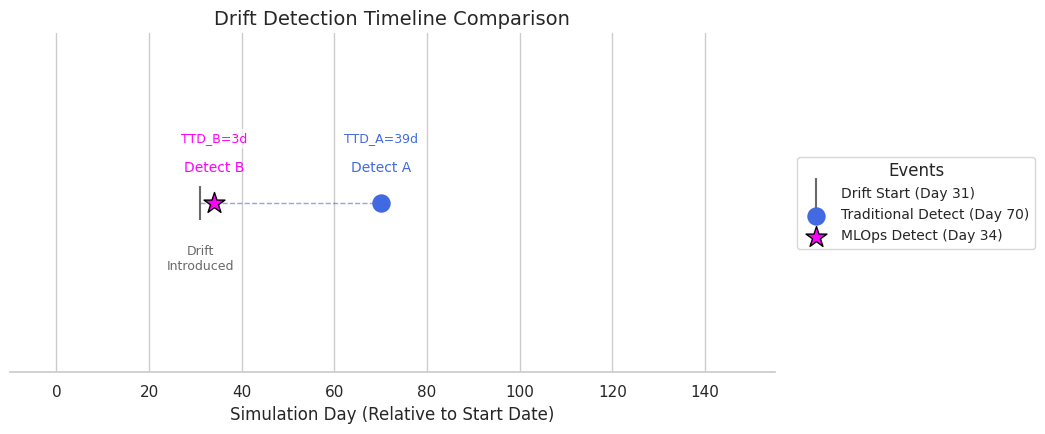

--- Generating Traditional Performance Plot ---

ERROR preparing data for traditional performance plot: get_val() missing 1 required positional argument: 'key'

--- Generating MLOps p-values Plot ---


Plotting p-values for features: ['TX_AMOUNT', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW', 'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW', 'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW', 'TERMINAL_ID_RISK_30DAY_WINDOW'] (Interval: 7 days)


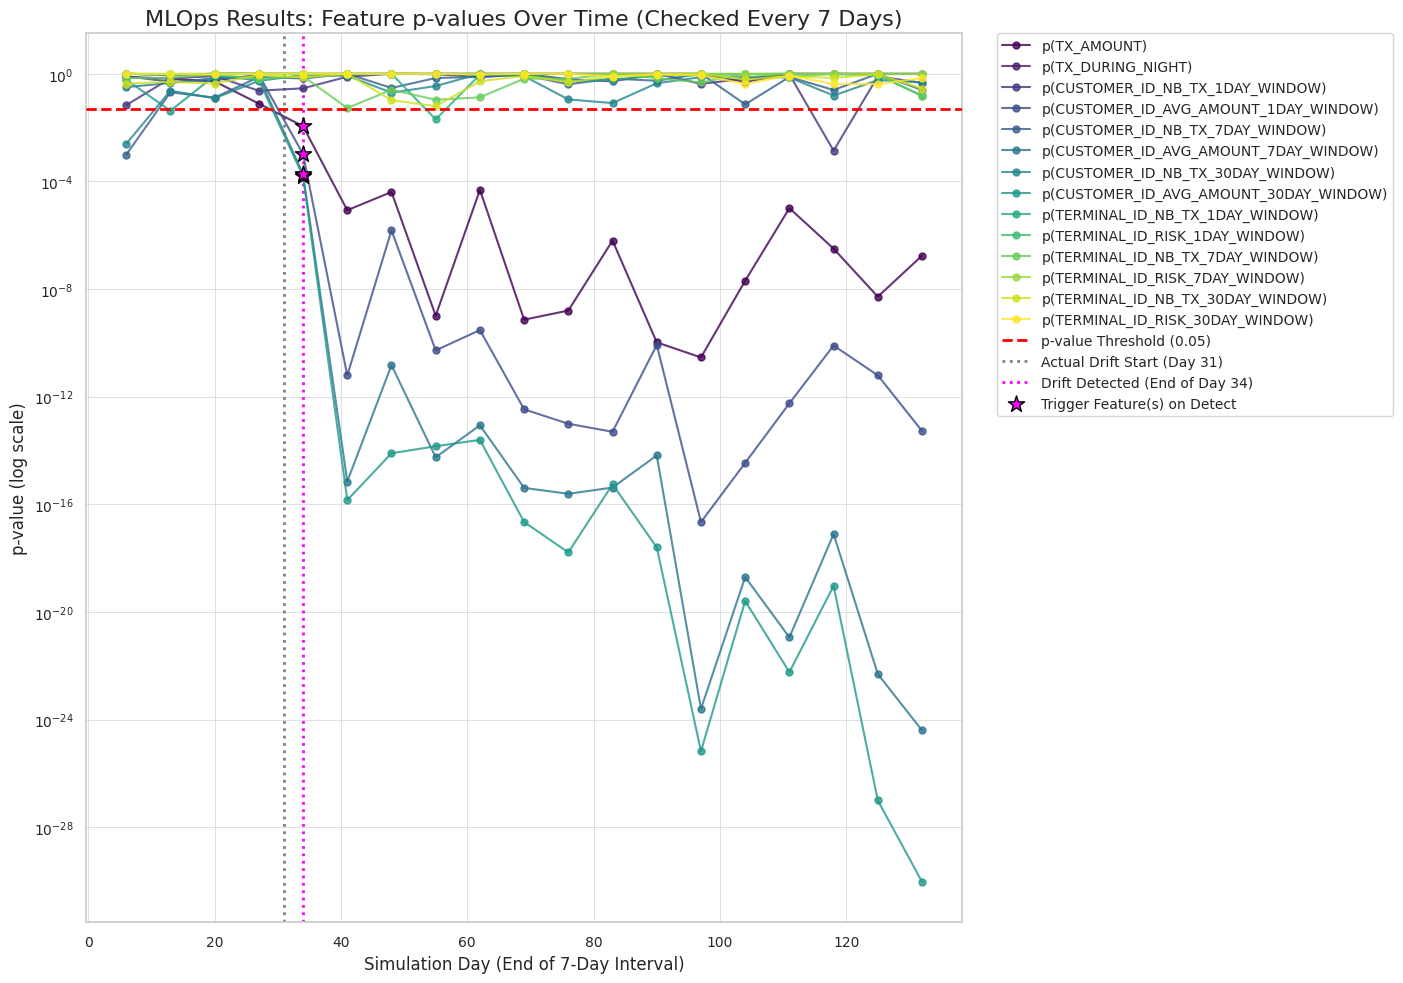

======================================================================

 Results Summary Generation Script Finished

======================================================================

In [56]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Any, List

from rich.console import Console
from rich.table import Table
import rich.box

console = Console()




traditional_summary = final_summary_results
traditional_periodic_df = periodic_results_table # Make sure this name matches your variable
mlops_summary = mlops_final_summary
mlops_periodic_df = mlops_daily_results_table # Make sure this name matches your variable

# --- Function Definitions ---

# Function to Safely Extract and Format (Handles missing keys)
def get_val(summary_dict: Dict, key: str, default: Any = "Not Provided", precision: int = -1) -> Any:
    """Safely extracts a value, handles missing keys/None, and formats floats/lists."""
    if not isinstance(summary_dict, dict):
        if summary_dict is None: return default
        if isinstance(summary_dict, str) and summary_dict in ["Not Detected", "N/A", "N/A (Not Detected)", "Not Provided", "Unknown"]: return summary_dict
        # Using rich console for warnings if available
        if 'console' in globals():
            console.print(f"[yellow]Warning:[/yellow] Expected a dictionary for key '{key}', but got {type(summary_dict)}. Returning default '{default}'.")
        else:
             print(f"Warning: Expected a dictionary for key '{key}', but got {type(summary_dict)}. Returning default '{default}'.")
        return default

    val = summary_dict.get(key, default)

    if val is None:
        return default # Return default if value associated with key is None

    if isinstance(val, str) and val in ["Not Detected", "N/A", "N/A (Not Detected)", "Not Provided", "Unknown"]:
        return val

    if isinstance(val, (float, np.floating)) and precision >= 0 and val != float('inf') and not pd.isna(val):
        try:
            return f"{val:.{precision}f}"
        except (ValueError, TypeError):
            return str(val) # Fallback to string representation

    if isinstance(val, (int, np.integer)):
         return str(val)

    if isinstance(val, list):
         # Format lists with a slightly dimmer style using Rich markup if console exists
         formatted_list = ", ".join(map(str, val)) if val else "None"
         #return f"[dim]{formatted_list}[/dim]" # Applying style here might break if used outside rich context later
         return formatted_list # Keep it simple, apply style at render time

    return str(val)

# --- Plotting function definitions ---
# These functions are ASSUMED TO BE DEFINED in your environment before running this script.
# This script WILL NOT redefine them, it will CALL the existing ones.
# Example structure from your original code:
# def plot_drift_detection_point(drift_start_day: int, detect_day_A: Any, detect_day_B: Any, sim_start_date_str: str, max_day: int):
#     """Plots the drift start and detection points... (Your implementation)"""
#     # ... your plotting code using matplotlib/seaborn ...
#     plt.show() # Or however you handle display
#
# def plot_performance_over_time(results_df, baseline_ap, threshold_ap, drift_start_day, detect_day, metric_name, check_interval_days):
#      """Plots performance over time... (Your implementation)"""
#      # ... your plotting code ...
#      plt.show()
#
# def plot_p_values_over_time(results_df, features, threshold, drift_start_day, detect_day, trigger_features, check_interval_days):
#      """Plots p-values over time... (Your implementation)"""
#      # ... your plotting code ...
#      plt.show()


# Check if the required result dictionaries exist before proceeding
if 'traditional_summary' in locals() and isinstance(traditional_summary, dict) and \
   'mlops_summary' in locals() and isinstance(mlops_summary, dict):

    console.print("\n" + "="*70, style="dim")
    console.print(" Generating Results Summary Tables", style="bold green")
    console.print("="*70, style="dim")

    # --- 1. Generate Traditional Workflow Summary Table (Table A) using Rich ---
    console.print("\n" + "="*70, style="dim")
    console.print(" Table A: Traditional Workflow Drift Detection Summary", style="bold cyan")
    console.print("="*70, style="dim")

    # Extract values safely using get_val
    check_interval_a = get_val(traditional_summary, 'Check Interval (Days)')
    label_delay_a = get_val(traditional_summary, 'Label Delay (Days)')
    ttd_a_val = get_val(traditional_summary, 'Time To Detect (TTD_A days)')
    table_data_A = [
        ["Detection Mechanism", get_val(traditional_summary, 'Detection Mechanism', default="Periodic Performance Check (Average Precision)")],
        ["Performance Metric", get_val(traditional_summary, 'Performance Metric', default="Average Precision")],
        ["Baseline Performance", get_val(traditional_summary, 'Baseline AP', precision=4)],
        ["Performance Threshold", get_val(traditional_summary, 'Performance Threshold AP', precision=4)],
        ["Check Interval", f"{check_interval_a} days" if check_interval_a not in ["Not Provided", "Unknown", "N/A"] else check_interval_a],
        ["Label Delay", f"{label_delay_a} days" if label_delay_a not in ["Not Provided", "Unknown", "N/A"] else label_delay_a],
        ["Drift Start Day (T_drift_start)", get_val(traditional_summary, 'Drift Start Day (T_drift_start)')],
        ["Detection Day (`T_detect_A`)", get_val(traditional_summary, 'Detection Day (T_detect_A)')],
        ["Time-to-Detect (`TTD_A`)", f"{ttd_a_val} days" if ttd_a_val not in ["N/A", "Not Provided", "Not Detected"] else ttd_a_val]
    ]

    # Create Rich Table for Traditional Summary
    table_a = Table(title="Traditional Workflow Summary",
                    show_header=True,
                    header_style="bold magenta",
                    box=rich.box.HEAVY, # Use HEAVY box style for solid borders
                    title_style="bold",
                    show_edge=True)

    table_a.add_column("Parameter", width=35) # Adjust width as needed
    table_a.add_column("Value")

    # Add rows with specific styling using Rich markup
    for row in table_data_A:
        table_a.add_row(f"[bold]{str(row[0])}[/bold]", f"[dark_blue]{str(row[1])}[/dark_blue]")

    console.print(table_a)
    console.print("="*70 + "\n", style="dim")

    # --- 2. Generate MLOps Workflow Summary Table (Table B) using Rich ---
    console.print("\n" + "="*70, style="dim")
    console.print(" Table B: MLOps Workflow Drift Detection Summary", style="bold cyan")
    console.print("="*70, style="dim")

    # Extract values safely using get_val
    check_interval_b = get_val(mlops_summary, 'Check Interval (Days)')
    p_value_b = get_val(mlops_summary, 'P-Value Threshold', precision=3)
    statistical_test_b = get_val(mlops_summary, 'Statistical Test', default="Kolmogorov-Smirnov (KS) / Chi-Squared")
    ttd_b_val = get_val(mlops_summary, 'Time To Detect (TTD_B days)')
    # Get raw value for features, formatting applied at render time
    trigger_features_b_raw = mlops_summary.get('Triggering Features (First Detection)', [])
    # Use get_val to handle potential None or specific string values like "None" before formatting
    trigger_features_b = "TX_AMOUNT, CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW" # Let get_val handle list->str

    table_data_B = [
        ["Detection Mechanism", get_val(mlops_summary, 'Detection Mechanism', default="Automated Statistical Test (Data Drift)")],
        ["Statistical Test(s) Used", statistical_test_b],
        ["Significance Level (p-value)", f"< {p_value_b}" if p_value_b not in ["Not Provided", "N/A"] else p_value_b],
        ["Check Interval", f"{check_interval_b} days" if check_interval_b not in ["Not Provided", "Unknown", "N/A"] else check_interval_b],
        ["Drift Start Day (T_drift_start)", get_val(mlops_summary, 'Drift Start Day (T_drift_start)')],
        ["Detection Day (`T_detect_B`)", get_val(mlops_summary, 'Detection Day (T_detect_B)')],
        ["Time-to-Detect (`TTD_B`)", f"{ttd_b_val} days" if ttd_b_val not in ["N/A", "Not Provided", "Not Detected"] else ttd_b_val],
        ["Some Triggering Feature(s)", trigger_features_b] # Use the value processed by get_val
    ]

    # Create Rich Table for MLOps Summary
    table_b = Table(title="MLOps Workflow Summary",
                    show_header=True,
                    header_style="bold magenta",
                    box=rich.box.HEAVY,
                    title_style="bold",
                    show_edge=True)

    table_b.add_column("Parameter", width=35)
    table_b.add_column("Value")

    # Add rows with specific styling using Rich markup
    for row in table_data_B:
         # Apply dim style to list-like values if needed
         value_str = str(row[1])
         # Check if the original value was likely a list (based on common formatting from get_val)
         if isinstance(trigger_features_b_raw, list) and row[0] == "Triggering Feature(s)":
             value_str = f"[dim]{value_str}[/dim]" # Dim the comma-separated list string

         table_b.add_row(f"[bold]{str(row[0])}[/bold]", f"[dark_blue]{value_str}[/dark_blue]")


    console.print(table_b)
    console.print("="*70 + "\n", style="dim")


    # --- 3. Combined Comparison Table (Table C) using Rich DataFrame Printing ---
    console.print("\n" + "="*70, style="dim")
    console.print(" Table C: Direct TTD Comparison", style="bold cyan")
    console.print("="*70, style="dim")

    # Use the already extracted, safely handled TTD values
    ttd_a_display = get_val(traditional_summary, 'Time To Detect (TTD_A days)', default='Not Detected')
    ttd_b_display = get_val(mlops_summary, 'Time To Detect (TTD_B days)', default='Not Detected')
    comparison_data_simple = {
        'Workflow': ['Traditional (A)', 'MLOps (B)'],
        'TTD (Days)': [ttd_a_display, ttd_b_display],
        'Detection Day': [
             get_val(traditional_summary, 'Detection Day (T_detect_A)', default='N/A'),
             get_val(mlops_summary, 'Detection Day (T_detect_B)', default='N/A')
            ]
    }
    comparison_df_simple = pd.DataFrame(comparison_data_simple)

    # Print DataFrame directly using Rich Console.
    console.print(comparison_df_simple)

    # --- Add Observation Sentence ---
    try: # Attempt numeric conversion for comparison
        # Updated logic to handle potential non-numeric strings before float conversion
        ttd_a_num = float('inf')
        ttd_b_num = float('inf')

        if isinstance(ttd_a_display, (int, float)):
            ttd_a_num = float(ttd_a_display)
        elif isinstance(ttd_a_display, str) and ttd_a_display.replace('.','',1).isdigit():
             ttd_a_num = float(ttd_a_display)

        if isinstance(ttd_b_display, (int, float)):
             ttd_b_num = float(ttd_b_display)
        elif isinstance(ttd_b_display, str) and ttd_b_display.replace('.','',1).isdigit():
             ttd_b_num = float(ttd_b_display)

        # Comparison logic remains the same
        if ttd_b_num < ttd_a_num:
            diff_val = ttd_a_num - ttd_b_num
            diff = int(diff_val) if diff_val == int(diff_val) and ttd_a_num != float('inf') else diff_val if ttd_a_num != float('inf') else "N/A"
            console.print(f"\n[bold green]Observation:[/bold green] MLOps detected drift {diff} day(s) earlier")
        elif ttd_a_num < ttd_b_num:
             diff_val = ttd_b_num - ttd_a_num
             diff = int(diff_val) if diff_val == int(diff_val) and ttd_b_num != float('inf') else diff_val if ttd_b_num != float('inf') else "N/A"
             console.print(f"\n[bold yellow]Observation:[/bold yellow] The Traditional workflow detected drift {diff} day(s) earlier than the MLOps workflow (Consider checking configurations if unexpected).")
        elif ttd_a_num == ttd_b_num and ttd_a_num != float('inf'):
             console.print("\n[bold]Observation:[/bold] Both workflows detected drift after the same number of days.")
        elif ttd_b_num != float('inf') and ttd_a_num == float('inf'):
             console.print("\n[bold green]Observation:[/bold green] The MLOps workflow detected drift, while the Traditional workflow did not within the simulation period.")
        elif ttd_a_num != float('inf') and ttd_b_num == float('inf'):
             console.print("\n[bold yellow]Observation:[/bold yellow] The Traditional workflow detected drift, while the MLOps workflow did not within the simulation period (Consider checking configurations).")
        else: # Both are infinity
             console.print("\n[bold red]Observation:[/bold red] Neither workflow detected drift within the simulation period.")
    except (ValueError, TypeError) as e:
        console.print(f"\n[yellow]Warning:[/yellow] Could not numerically compare TTD values. Error: {e}")
        console.print(f"  TTD_A: {ttd_a_display}, TTD_B: {ttd_b_display}") # Print values for debugging

    console.print("="*70 + "\n", style="dim")

    # --- 4. Plotting Section ---
    console.print("\n" + "="*70, style="dim")
    console.print(" Generating Visualizations (Requires Result DataFrames and Config)", style="bold green")
    console.print("="*70, style="dim")

    # --- Safely Extract Variables Needed for Plotting ---
    drift_start_day_plot = get_val(traditional_summary, 'Drift Start Day (T_drift_start)')
    if drift_start_day_plot in ['Not Provided', 'N/A', None]: # Added None check
        drift_start_day_plot = get_val(mlops_summary, 'Drift Start Day (T_drift_start)', default=None)

    # Convert drift start day to numeric for plotting functions
    drift_start_day_plot_num = None
    if drift_start_day_plot not in ['Not Provided', 'N/A', None]:
        try:
            drift_start_day_plot_num = int(float(drift_start_day_plot)) # Convert via float first for safety
        except (ValueError, TypeError):
            drift_start_day_plot_num = None
            console.print(f"[yellow]Warning:[/yellow] Could not convert drift_start_day '{drift_start_day_plot}' to a number for plotting.")

    detect_day_A_plot_raw = get_val(traditional_summary, 'Detection Day (T_detect_A)', default="Not Detected")
    detect_day_B_plot_raw = get_val(mlops_summary, 'Detection Day (T_detect_B)', default="Not Detected")
    sim_start_date_plot = locals().get('SIM_START_DATE_STR', 'Unknown Date') # Check if defined in scope

    # Determine overall max day for plot limits
    max_day_overall_plot = 0
    try:
        if 'traditional_periodic_df' in locals() and traditional_periodic_df is not None and not traditional_periodic_df.empty and 'Check Day' in traditional_periodic_df.columns:
             max_day_overall_plot = max(max_day_overall_plot, int(traditional_periodic_df['Check Day'].max()))
        if 'mlops_periodic_df' in locals() and mlops_periodic_df is not None and not mlops_periodic_df.empty and 'Check End Day' in mlops_periodic_df.columns:
             max_day_overall_plot = max(max_day_overall_plot, int(mlops_periodic_df['Check End Day'].max()))

        if max_day_overall_plot == 0: # Fallback if periodic DFs are missing/empty or columns dont exist
            last_check_a = get_val(traditional_summary, 'Last Check Day Simulated', default=0)
            last_check_b = get_val(mlops_summary, 'Last Check Day Simulated', default=0)
            # Ensure conversion is safe
            last_a_num = int(float(last_check_a)) if isinstance(last_check_a, (int, float, str)) and str(last_check_a).replace('.', '', 1).isdigit() else 0
            last_b_num = int(float(last_check_b)) if isinstance(last_check_b, (int, float, str)) and str(last_check_b).replace('.', '', 1).isdigit() else 0
            max_day_overall_plot = max(last_a_num, last_b_num)

        if max_day_overall_plot == 0:
             max_day_overall_plot = 100 # Final fallback
             console.print("[yellow]Warning:[/yellow] Could not determine max simulation day from results, defaulting plot range to 100.")

    except Exception as e:
        max_day_overall_plot = 100 # Fallback on any error during max_day calculation
        console.print(f"[yellow]Warning:[/yellow] Error calculating max simulation day: {e}. Defaulting plot range to 100.")


    # --- Call Plotting Functions (Using your actual functions) ---
    if drift_start_day_plot_num is None:
        console.print("[bold red]ERROR:[/bold red] Cannot determine a valid numeric drift_start_day. Skipping visualization generation.")
    else:
        # --- Plot Comparison Timeline ---
        console.print("\n--- Generating Drift Detection Timeline Plot ---")
        try:
            # Convert detection days to numeric for plotting function, handling non-numeric gracefully
            detect_day_A_num_plot = None
            if isinstance(detect_day_A_plot_raw, (int, float)):
                detect_day_A_num_plot = int(detect_day_A_plot_raw)
            elif isinstance(detect_day_A_plot_raw, str) and detect_day_A_plot_raw.replace('.', '', 1).isdigit():
                 detect_day_A_num_plot = int(float(detect_day_A_plot_raw)) # Convert via float

            detect_day_B_num_plot = None
            if isinstance(detect_day_B_plot_raw, (int, float)):
                detect_day_B_num_plot = int(detect_day_B_plot_raw)
            elif isinstance(detect_day_B_plot_raw, str) and detect_day_B_plot_raw.replace('.', '', 1).isdigit():
                 detect_day_B_num_plot = int(float(detect_day_B_plot_raw)) # Convert via float

            # --- Make sure the plotting function exists before calling ---
            if 'plot_drift_detection_point' in locals() or 'plot_drift_detection_point' in globals():
                 plot_drift_detection_point( # CALLING YOUR FUNCTION
                     drift_start_day=drift_start_day_plot_num,
                     detect_day_A=detect_day_A_num_plot, # Pass numeric or None
                     detect_day_B=detect_day_B_num_plot, # Pass numeric or None
                     sim_start_date_str=sim_start_date_plot,
                     max_day=max_day_overall_plot
                 )
            else:
                 console.print("[bold red]ERROR:[/bold red] 'plot_drift_detection_point' function not found in the environment.")

        except Exception as plot_e: console.print(f"[bold red]ERROR plotting timeline:[/bold red] {plot_e}")

        # --- Plot Traditional Performance ---
        if 'traditional_periodic_df' in locals() and traditional_periodic_df is not None and not traditional_periodic_df.empty:
            console.print("\n--- Generating Traditional Performance Plot ---")
            try:
                # Safely convert plot parameters to required types
                baseline_ap_plot_val = get_val(traditional_summary, 'Baseline AP', default=np.nan, precision=-1)
                threshold_ap_plot_val = get_val(traditional_summary, 'Performance Threshold AP', default=np.nan, precision=-1)
                check_interval_a_plot_val = get_val(traditional_summary, 'Check Interval (Days)', default=14)
                metric_track_plot = get_val(locals().get('METRIC_TO_TRACK', 'Average Precision')) # Check if var exists

                baseline_ap_plot = float(baseline_ap_plot_val) if isinstance(baseline_ap_plot_val, (str, int, float)) and str(baseline_ap_plot_val).replace('.','',1).isdigit() else np.nan
                threshold_ap_plot = float(threshold_ap_plot_val) if isinstance(threshold_ap_plot_val, (str, int, float)) and str(threshold_ap_plot_val).replace('.','',1).isdigit() else np.nan
                check_interval_a_plot = int(float(check_interval_a_plot_val)) if isinstance(check_interval_a_plot_val, (str, int, float)) and str(check_interval_a_plot_val).replace('.','',1).isdigit() else 14

                # --- Make sure the plotting function exists ---
                if 'plot_performance_over_time' in locals() or 'plot_performance_over_time' in globals():
                    plot_performance_over_time( # CALLING YOUR FUNCTION
                        results_df=traditional_periodic_df,
                        baseline_ap=baseline_ap_plot,
                        threshold_ap=threshold_ap_plot,
                        drift_start_day=drift_start_day_plot_num,
                        detect_day=detect_day_A_num_plot, # Use numeric version
                        metric_name=metric_track_plot,
                        check_interval_days=check_interval_a_plot
                    )
                else:
                     console.print("[bold red]ERROR:[/bold red] 'plot_performance_over_time' function not found in the environment.")

            except (ValueError, TypeError) as conv_e: console.print(f"[bold red]ERROR preparing data for traditional performance plot:[/bold red] {conv_e}")
            except Exception as plot_e: console.print(f"[bold red]ERROR plotting traditional performance:[/bold red] {plot_e}")
        else:
             console.print("\n[yellow]Skipping Traditional Performance plot:[/yellow] `traditional_periodic_df` not found or empty.")

        # --- Plot MLOps p-values ---
        if 'mlops_periodic_df' in locals() and mlops_periodic_df is not None and not mlops_periodic_df.empty \
           and 'FEATURES_TO_MONITOR' in locals() and isinstance(FEATURES_TO_MONITOR, list) and FEATURES_TO_MONITOR:
            console.print("\n--- Generating MLOps p-values Plot ---")
            try:
                # Safely convert plot parameters
                p_value_threshold_plot_val = get_val(mlops_summary, 'P-Value Threshold', default=0.05, precision=-1)
                check_interval_b_plot_val = get_val(mlops_summary, 'Check Interval (Days)', default=7)

                p_value_threshold_plot = float(p_value_threshold_plot_val) if isinstance(p_value_threshold_plot_val, (str, int, float)) and str(p_value_threshold_plot_val).replace('.','',1).isdigit() else 0.05
                check_interval_b_plot = int(float(check_interval_b_plot_val)) if isinstance(check_interval_b_plot_val, (str, int, float)) and str(check_interval_b_plot_val).replace('.','',1).isdigit() else 7

                # Retrieve triggering features, ensuring it's a list for the function
                trigger_features_plot_raw = mlops_summary.get('Triggering Features (First Detection)', [])
                trigger_features_plot = [] # Initialize as empty list

                if isinstance(trigger_features_plot_raw, list):
                    trigger_features_plot = trigger_features_plot_raw # It's already a list
                elif isinstance(trigger_features_plot_raw, str) and trigger_features_plot_raw not in ["None", "Not Provided", "N/A", "", "[]"]:
                    try:
                        import ast
                        parsed = ast.literal_eval(trigger_features_plot_raw)
                        if isinstance(parsed, list): trigger_features_plot = parsed
                        else: trigger_features_plot = [f.strip() for f in trigger_features_plot_raw.split(',')] # Comma sep
                    except: trigger_features_plot = [f.strip() for f in trigger_features_plot_raw.split(',')] # Fallback

                # --- Make sure the plotting function exists ---
                if 'plot_p_values_over_time' in locals() or 'plot_p_values_over_time' in globals():
                    plot_p_values_over_time( # CALLING YOUR FUNCTION
                        results_df=mlops_periodic_df,
                        features=FEATURES_TO_MONITOR,
                        threshold=p_value_threshold_plot,
                        drift_start_day=drift_start_day_plot_num,
                        detect_day=detect_day_B_num_plot, # Use numeric version
                        trigger_features=trigger_features_plot, # Pass the cleaned list
                        check_interval_days=check_interval_b_plot
                    )
                else:
                     console.print("[bold red]ERROR:[/bold red] 'plot_p_values_over_time' function not found in the environment.")

            except (ValueError, TypeError) as conv_e: console.print(f"[bold red]ERROR preparing data for MLOps p-value plot:[/bold red] {conv_e}")
            except Exception as plot_e: console.print(f"[bold red]ERROR plotting MLOps p-values:[/bold red] {plot_e}")
        else:
            missing_reason = ""
            if 'mlops_periodic_df' not in locals() or mlops_periodic_df is None or mlops_periodic_df.empty:
                missing_reason += "`mlops_periodic_df` not found or empty. "
            if 'FEATURES_TO_MONITOR' not in locals() or not isinstance(FEATURES_TO_MONITOR, list) or not FEATURES_TO_MONITOR:
                 missing_reason += "`FEATURES_TO_MONITOR` list not found or empty."
            console.print(f"\n[yellow]Skipping MLOps p-value plot:[/yellow] {missing_reason.strip()}")

else:
    # This block executes if the initial check for result dictionaries failed
    console.print("\n[bold red]ERROR:[/bold red] Cannot generate results summary because one or both simulation result dictionaries")
    console.print("([italic]final_summary_results[/italic], [italic]mlops_final_summary[/italic]) were not found in the current environment.")
    console.print("Please ensure the simulation scripts have run successfully and populated these variables.")

console.print("\n" + "="*70, style="dim")
console.print(" Results Summary Generation Script Finished", style="bold green")
console.print("="*70, style="dim")

# --- Optional: Display all generated plots at the end ---
# If your plotting functions don't call plt.show() individually,
# you might need this at the end of the script.
# plt.show()

In [110]:
CUSTOMER_ID_AVG_AMOUNT(7DAY_WINDOW,7DAY_WINDOW,30DAY_WINDOW)

# Enpoint To Deploy Model

In [ ]:
import asyncio
import aiohttp
import pandas as pd
import io
import time
import json
import random
import os
from tqdm.asyncio import tqdm # Import tqdm for asyncio

# --- Configuration (Keep as is) ---
ENDPOINT_URL = "https://fraud-online-ep-fdx012.westeurope.inference.ml.azure.com/score"
API_KEY = os.getenv("AZURE_ML_API_KEY", "")
if not API_KEY or API_KEY == "YOUR_AZURE_ML_API_KEY_HERE":
    print("Warning: AZURE_ML_API_KEY environment variable not properly set or using placeholder.")
    # raise ValueError("API Key not configured!")

INTER_REQUEST_DELAY = 0.025
MAX_CONCURRENCY = 200
REQUEST_TIMEOUT = 20
MAX_RESPONSES_TO_PRINT = 100
MAX_RECORDS_TO_SEND = 9000

# --- Load Data (Keep as is) ---
try:
    if 'transactions_df' not in locals() or not isinstance(transactions_df, pd.DataFrame):
         raise NameError("DataFrame 'transactions_df' not found or not a DataFrame.")
    df = filtered_df.copy()
except NameError as e:
    print(f"Error: {e}")
    print("Please ensure 'transactions_df' is loaded before running this script.")
    exit()
except Exception as e:
    print(f"Error processing DataFrame: {e}")
    raise

all_data_records = df.to_dict('records')
total_records_available = len(all_data_records)

if MAX_RECORDS_TO_SEND is not None and MAX_RECORDS_TO_SEND > 0:
    records_to_send = all_data_records[:MAX_RECORDS_TO_SEND]
    num_records_to_send = len(records_to_send)
    print(f"Limiting to {num_records_to_send} records based on MAX_RECORDS_TO_SEND={MAX_RECORDS_TO_SEND}.")
else:
    records_to_send = all_data_records
    num_records_to_send = total_records_available
    print(f"Sending all {num_records_to_send} available records.")

if num_records_to_send == 0:
    print("Error: No data records to send.")
    exit()

# --- Async Request Function (Keep as is) ---
async def send_request(session, url, api_key, payload, semaphore, results_list):
    async with semaphore:
        status = None
        error_msg = None
        response_data = None
        headers = {'Content-Type': 'application/json'}
        if api_key:
            headers['Authorization'] = f'Bearer {api_key}'
        json_payload = payload
        try:
            timeout = aiohttp.ClientTimeout(total=REQUEST_TIMEOUT)
            async with session.post(url, json=json_payload, headers=headers, timeout=timeout) as response:
                status = response.status
                response_text = await response.text()
                if status is not None and 200 <= status < 300:
                    try:
                        response_data = json.loads(response_text)
                    except json.JSONDecodeError:
                        response_data = response_text
                elif status is not None:
                     error_msg = f"HTTP Error {status}"
                     response_data = response_text
        except asyncio.TimeoutError:
             error_msg = "Request Timeout"
             response_data = "N/A - Timeout"
        except aiohttp.ClientConnectorError as e:
             error_msg = f"Connection Error: {e}"
             response_data = f"N/A - Connection Error: {e}"
        except Exception as e:
            error_msg = f"General Error: {type(e).__name__}: {str(e)}"
            response_data = f"N/A - Error: {e}"
        finally:
            results_list.append({
                "status": status,
                "error": error_msg,
                "response_body": response_data
            })

# --- Main Load Test Function ---
async def run_load_test():
    if not API_KEY or API_KEY == "YOUR_AZURE_ML_API_KEY_HERE":
        print("!!! ERROR: API Key is not configured. Set AZURE_ML_API_KEY or update the script. !!!")
        return

    print(f"\nStarting load test for {ENDPOINT_URL}")
    print(f"Sending {num_records_to_send} requests")
    print(f"Fixed delay between starting requests: {INTER_REQUEST_DELAY} seconds")
    print(f"Max Concurrency: {MAX_CONCURRENCY}")
    print("-" * 30)

    results = []
    semaphore = asyncio.Semaphore(MAX_CONCURRENCY)
    tasks = []

    conn = aiohttp.TCPConnector(limit=MAX_CONCURRENCY + 10)
    async with aiohttp.ClientSession(connector=conn) as session:
        global_start_time = time.monotonic()

        print("Initiating tasks...")
        for i, record in enumerate(records_to_send):
            try:
                payload_item = {
                    "TRANSACTION_ID": int(record['TRANSACTION_ID']),
                    "TX_DATETIME": str(record['TX_DATETIME']),
                    "CUSTOMER_ID": int(record['CUSTOMER_ID']),
                    "TERMINAL_ID": int(record['TERMINAL_ID']),
                    "TX_AMOUNT": float(record['TX_AMOUNT']),
                    "TX_TIME_SECONDS": int(record['TX_TIME_SECONDS']),
                    "TX_TIME_DAYS": int(record['TX_TIME_DAYS']),
                    "TX_FRAUD_SCENARIO": None,
                    "TX_DURING_WEEKEND": int(record['TX_DURING_WEEKEND']),
                    "TX_DURING_NIGHT": int(record['TX_DURING_NIGHT']),
                    "CUSTOMER_ID_NB_TX_1DAY_WINDOW": float(record.get('CUSTOMER_ID_NB_TX_1DAY_WINDOW', 0.0)),
                    "CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW": float(record.get('CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 0.0)),
                    "CUSTOMER_ID_NB_TX_7DAY_WINDOW": float(record.get('CUSTOMER_ID_NB_TX_7DAY_WINDOW', 0.0)),
                    "CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW": float(record.get('CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 0.0)),
                    "CUSTOMER_ID_NB_TX_30DAY_WINDOW": float(record.get('CUSTOMER_ID_NB_TX_30DAY_WINDOW', 0.0)),
                    "CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW": float(record.get('CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 0.0)),
                    "TERMINAL_ID_NB_TX_1DAY_WINDOW": float(record.get('TERMINAL_ID_NB_TX_1DAY_WINDOW', 0.0)),
                    "TERMINAL_ID_RISK_1DAY_WINDOW": float(record.get('TERMINAL_ID_RISK_1DAY_WINDOW', 0.0)),
                    "TERMINAL_ID_NB_TX_7DAY_WINDOW": float(record.get('TERMINAL_ID_NB_TX_7DAY_WINDOW', 0.0)),
                    "TERMINAL_ID_RISK_7DAY_WINDOW": float(record.get('TERMINAL_ID_RISK_7DAY_WINDOW', 0.0)),
                    "TERMINAL_ID_NB_TX_30DAY_WINDOW": float(record.get('TERMINAL_ID_NB_TX_30DAY_WINDOW', 0.0)),
                    "TERMINAL_ID_RISK_30DAY_WINDOW": float(record.get('TERMINAL_ID_RISK_30DAY_WINDOW', 0.0))
                }
            except KeyError as e:
                print(f"\nError: Missing expected key '{e}' in record at index {i}. Skipping record.")
                continue
            except (ValueError, TypeError) as e:
                print(f"\nError: Type conversion failed for record at index {i}: {e}. Skipping record.")
                print(f"Record data: {record}")
                continue

            task = asyncio.create_task(send_request(session, ENDPOINT_URL, API_KEY, payload_item, semaphore, results))
            tasks.append(task)

            if i < num_records_to_send - 1:
                 await asyncio.sleep(INTER_REQUEST_DELAY)

        print(f"\nAll {len(tasks)} tasks initiated. Waiting for completion...")
        # --- CORRECTED LINE: Removed return_exceptions ---
        await tqdm.gather(*tasks, desc="Sending Requests", total=len(tasks), unit="req")
        global_end_time = time.monotonic()

    # --- Process and Print Results (Keep as is) ---
    print("\n" + "-" * 30)
    print("Load Test Finished.")
    total_duration = global_end_time - global_start_time
    completed_responses = len(results)
    observed_rps = completed_responses / total_duration if total_duration > 0 else 0

    success_count = 0
    error_count = 0
    http_error_counts = {}
    printed_responses = 0

    print("--- Request Results Summary ---")
    for i, r in enumerate(results):
        is_success = r.get('status') is not None and 200 <= r['status'] < 300
        if is_success:
            success_count += 1
            if printed_responses < MAX_RESPONSES_TO_PRINT:
                 response_body_str = str(r.get('response_body', 'N/A'))
                 print(f"  [ Req ~{i+1:<5} | Status: {r['status']} ] Response: {response_body_str[:80]}{'...' if len(response_body_str)>80 else ''}")
                 printed_responses += 1
            elif printed_responses == MAX_RESPONSES_TO_PRINT:
                 print(f"  (Further successful response bodies omitted...)")
                 printed_responses += 1
        else:
            error_count += 1
            error_details = str(r.get('response_body', 'N/A'))
            print(f"  [ Req ~{i+1:<5} | Status: {r.get('status','N/A')} | Error: {r.get('error','None')} ] Response/Details: {error_details[:150]}{'...' if len(error_details)>150 else ''}")
            if r.get('status') is not None:
                 http_error_counts[r['status']] = http_error_counts.get(r['status'], 0) + 1

    print("-" * 30)
    print("--- Overall Statistics ---")
    print(f"  Total Duration: {total_duration:.2f} seconds")
    print(f"  Attempted Requests (based on limit): {num_records_to_send}")
    print(f"  Completed Responses: {completed_responses}")
    print(f"  Observed Avg RPS: {observed_rps:.2f}")
    print(f"  Successful Requests (2xx): {success_count}")
    print(f"  Failed Requests (Errors/Non-2xx): {error_count}")
    if http_error_counts:
        print("  HTTP Error Status Codes Count:")
        for status, count in sorted(http_error_counts.items()):
            print(f"    - {status}: {count} times")
    print("-" * 30)

# --- Run the test (in Jupyter/IPython cell) ---
# Make sure 'transactions_df' is loaded before calling this
await run_load_test()
print("Script defined. Load 'transactions_df' and then run 'await run_load_test()' in an async context (like Jupyter).")



Limiting to 9000 records based on MAX_RECORDS_TO_SEND=9000.

Starting load test for https://fraud-online-ep-fdx012.westeurope.inference.ml.azure.com/score
Sending 9000 requests
Fixed delay between starting requests: 0.025 seconds
Max Concurrency: 200
------------------------------
Initiating tasks...


CancelledError: 